<a href="https://colab.research.google.com/github/Miguithub/MF-BTC/blob/main/BTC_m2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# LIBRERIAS 1

In [5]:
import requests
import pandas as pd
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

---

# CRIPTO

In [2]:
!pip install python-binance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.2 MB/s eta 0:00:00


In [9]:
from binance.client import Client
import pandas as pd
import time

# === TU API KEY (SÓLO LOCAL) ===
api_key = "VkxkxFVvF6ngYUe5NEPP1hXPEnxOvm58wyZoiZunOfPB1ivZGRcgYvU6F9uZ7Ffq"
api_secret = "dCYI6gHzzNCqKrOjntt1rwslZU8oZNItE5Tl2zciSQhs0XQpe4zEOotJ1L8ohhy9"

client = Client(api_key, api_secret)

# === Parámetros ===
symbol = "BTCUSDT"
interval = Client.KLINE_INTERVAL_5MINUTE
start_str = int(pd.Timestamp("2017-01-01").timestamp() * 1000)
limit = 1000  # Máximo por request

# === Función para paginar ===
def get_klines(symbol, interval, start_str):
    output = []
    while True:
        klines = client.get_klines(symbol=symbol, interval=interval, startTime=start_str, limit=limit)
        if not klines:
            break
        output += klines
        start_str = klines[-1][0] + 1
        time.sleep(0.5)  # para no sobrecargar
        if len(klines) < limit:
            break
    return output

# === Descarga ===
data = get_klines(symbol, interval, start_str)
mf1 = pd.DataFrame(data, columns=[
    'timestamp', 'open', 'high', 'low', 'close', 'volume',
    'close_time', 'quote_asset_volume', 'num_trades',
    'taker_buy_base_vol', 'taker_buy_quote_vol', 'ignore'
])

# === Conversión de timestamp
mf1['timestamp'] = pd.to_datetime(mf1['timestamp'], unit='ms')
mf1['timestamp'] = mf1['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')  # como string formato YYYY-MM-DD HH:MM:SS

# === Opcional: volver timestamp índice si lo querés así
# mf1.set_index('timestamp', inplace=True)

# === Conversión a float para columnas numéricas (menos timestamp)
for col in mf1.columns:
    if col != 'timestamp':
        mf1[col] = mf1[col].astype(float)

# === Mostrar primeros datos
print(mf1.head())

             timestamp     open     high      low    close    volume  \
0  2017-08-17 04:00:00  4261.48  4280.56  4261.48  4261.48  2.189061   
1  2017-08-17 04:05:00  4261.48  4261.48  4261.48  4261.48  0.000000   
2  2017-08-17 04:10:00  4261.48  4261.48  4261.48  4261.48  0.000000   
3  2017-08-17 04:15:00  4261.48  4264.88  4261.48  4261.48  0.484666   
4  2017-08-17 04:20:00  4264.88  4266.29  4264.88  4266.29  2.328570   

     close_time  quote_asset_volume  num_trades  taker_buy_base_vol  \
0  1.502943e+12         9333.620962         9.0            0.489061   
1  1.502943e+12            0.000000         0.0            0.000000   
2  1.502943e+12            0.000000         0.0            0.000000   
3  1.502944e+12         2065.447829         9.0            0.085455   
4  1.502944e+12         9931.161124        11.0            1.546491   

   taker_buy_quote_vol  ignore  
0          2089.104962     0.0  
1             0.000000     0.0  
2             0.000000     0.0  
3       

In [10]:
mf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833440 entries, 0 to 833439
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   timestamp            833440 non-null  object 
 1   open                 833440 non-null  float64
 2   high                 833440 non-null  float64
 3   low                  833440 non-null  float64
 4   close                833440 non-null  float64
 5   volume               833440 non-null  float64
 6   close_time           833440 non-null  float64
 7   quote_asset_volume   833440 non-null  float64
 8   num_trades           833440 non-null  float64
 9   taker_buy_base_vol   833440 non-null  float64
 10  taker_buy_quote_vol  833440 non-null  float64
 11  ignore               833440 non-null  float64
dtypes: float64(11), object(1)
memory usage: 76.3+ MB


In [14]:
from binance.client import Client
import pandas as pd
import time

# === TU API KEY (SÓLO LOCAL) ===
api_key = "VkxkxFVvF6ngYUe5NEPP1hXPEnxOvm58wyZoiZunOfPB1ivZGRcgYvU6F9uZ7Ffq"
api_secret = "dCYI6gHzzNCqKrOjntt1rwslZU8oZNItE5Tl2zciSQhs0XQpe4zEOotJ1L8ohhy9"

client = Client(api_key, api_secret)

# === Parámetros ===
symbol = "BTCUSDT"  # Par de futuros
interval = Client.KLINE_INTERVAL_5MINUTE  # Intervalo de 5 minutos
start_str = int(pd.Timestamp("2017-01-01").timestamp() * 1000)  # Timestamp inicial (ms)
limit = 1000  # Máximo de velas por request

# === Función para paginar (obtener todos los datos históricos de futuros) ===
def get_futures_klines(symbol, interval, start_time):
    output = []
    while True:
        # Usamos la API de futuros para obtener klines (velas):contentReference[oaicite:1]{index=1}
        klines = client.futures_klines(symbol=symbol, interval=interval, startTime=start_time, limit=limit)
        if not klines:
            break
        output += klines
        # Avanzamos el tiempo de inicio al siguiente después del último recibido
        start_time = klines[-1][0] + 1
        time.sleep(0.5)  # Pequeña pausa para no sobrecargar la API
        if len(klines) < limit:
            break
    return output

# === Descarga de datos de Futuros ===
data = get_futures_klines(symbol, interval, start_str)
mf2 = pd.DataFrame(data, columns=[
    'timestamp', 'open', 'high', 'low', 'close', 'volume',
    'close_time', 'quote_asset_volume', 'num_trades',
    'taker_buy_base_vol', 'taker_buy_quote_vol', 'ignore'
])

# === Conversión de timestamp a formato legible
mf2['timestamp'] = pd.to_datetime(mf2['timestamp'], unit='ms')
mf2['timestamp'] = mf2['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')  # como string formato YYYY-MM-DD HH:MM:SS

# === Opcional: establecer el timestamp como índice
# mf1.set_index('timestamp', inplace=True)

# === Conversión a float para columnas numéricas (menos timestamp)
for col in mf1.columns:
    if col != 'timestamp':
        mf2[col] = mf2[col].astype(float)

# === Mostrar primeros datos obtenidos
print(mf2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618421 entries, 0 to 618420
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   timestamp            618421 non-null  object 
 1   open                 618421 non-null  float64
 2   high                 618421 non-null  float64
 3   low                  618421 non-null  float64
 4   close                618421 non-null  float64
 5   volume               618421 non-null  float64
 6   close_time           618421 non-null  float64
 7   quote_asset_volume   618421 non-null  float64
 8   num_trades           618421 non-null  float64
 9   taker_buy_base_vol   618421 non-null  float64
 10  taker_buy_quote_vol  618421 non-null  float64
 11  ignore               618421 non-null  float64
dtypes: float64(11), object(1)
memory usage: 56.6+ MB
None


In [18]:
# Agregar prefijo 'f_' a todas las columnas de mf2
mf2.columns = ['f_' + col for col in mf2.columns]

In [16]:
mf2.tail()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_buy_base_vol,taker_buy_quote_vol,ignore
618416,2025-07-26 00:35:00,117567.5,117585.1,117486.9,117516.3,217.443,1.753490e+12,2.555875e+07,5597.0,90.699,1.066145e+07,0.0
618417,2025-07-26 00:40:00,117516.4,117565.8,117429.5,117438.8,263.523,1.753491e+12,3.095773e+07,6232.0,72.729,8.543791e+06,0.0
618418,2025-07-26 00:45:00,117438.8,117438.9,117308.9,117314.9,280.203,1.753491e+12,3.288613e+07,7092.0,86.474,1.014726e+07,0.0
618419,2025-07-26 00:50:00,117315.0,117423.2,117314.9,117395.6,152.197,1.753491e+12,1.786470e+07,4276.0,65.628,7.703409e+06,0.0
618420,2025-07-26 00:55:00,117395.7,117395.7,117395.6,117395.6,0.720,1.753492e+12,8.452486e+04,40.0,0.239,2.805757e+04,0.0


In [ ]:
mf1.head()

,Datetime,Open,High,Low,Close,Volume,cp2
0,2023-06-30 00:00:00,30445.669922,30471.0,30424.220703,30446.349609,54.037754,NaN
1,2023-06-30 00:05:00,30446.349609,30489.0,30428.519531,30470.259766,20.948629,NaN
2,2023-06-30 00:10:00,30470.460938,30488.0,30417.230469,30417.779297,23.721727,23.91
3,2023-06-30 00:15:00,30417.460938,30479.0,30393.140625,30434.939453,36.841537,-52.48
4,2023-06-30 00:20:00,30434.939453,30485.0,30420.589844,30473.199219,19.103188,17.16


In [20]:
# Asegurarse de que 'timestamp' esté en formato datetime
mf1['timestamp'] = pd.to_datetime(mf1['timestamp'])
mf2['f_timestamp'] = pd.to_datetime(mf2['f_timestamp'])

# Renombrar la columna 'f_timestamp' de mf2 a 'timestamp' para hacer el merge
mf2 = mf2.rename(columns={'f_timestamp': 'timestamp'})

# Filtrar mf1 para que solo incluya el rango deseado
start = mf2['timestamp'].min()
end = mf1['timestamp'].max()

mf1_filtered = mf1[(mf1['timestamp'] >= start) & (mf1['timestamp'] <= end)]

# Merge por timestamp
mf = pd.merge(mf1_filtered, mf2, on='timestamp', how='left')

# Resultado final
print(mf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617894 entries, 0 to 617893
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   timestamp              617894 non-null  datetime64[ns]
 1   open                   617894 non-null  float64       
 2   high                   617894 non-null  float64       
 3   low                    617894 non-null  float64       
 4   close                  617894 non-null  float64       
 5   volume                 617894 non-null  float64       
 6   close_time             617894 non-null  float64       
 7   quote_asset_volume     617894 non-null  float64       
 8   num_trades             617894 non-null  float64       
 9   taker_buy_base_vol     617894 non-null  float64       
 10  taker_buy_quote_vol    617894 non-null  float64       
 11  ignore                 617894 non-null  float64       
 12  f_open                 617894 non-null  floa

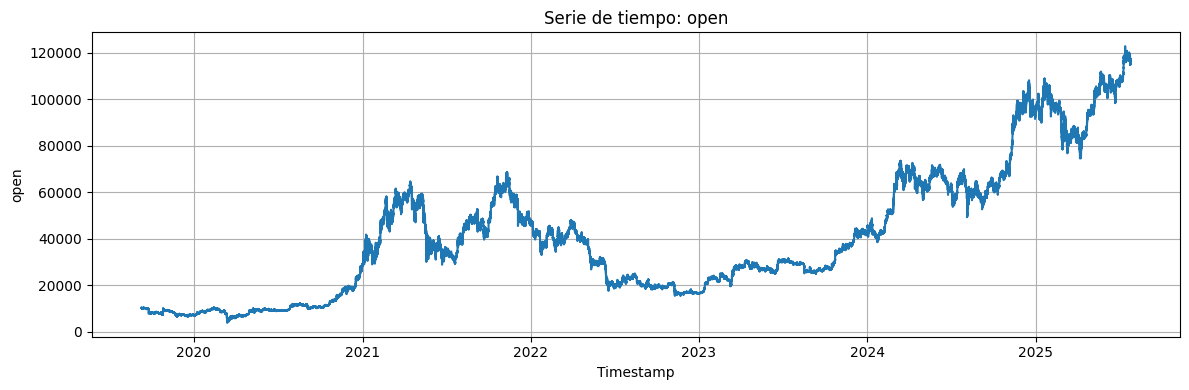

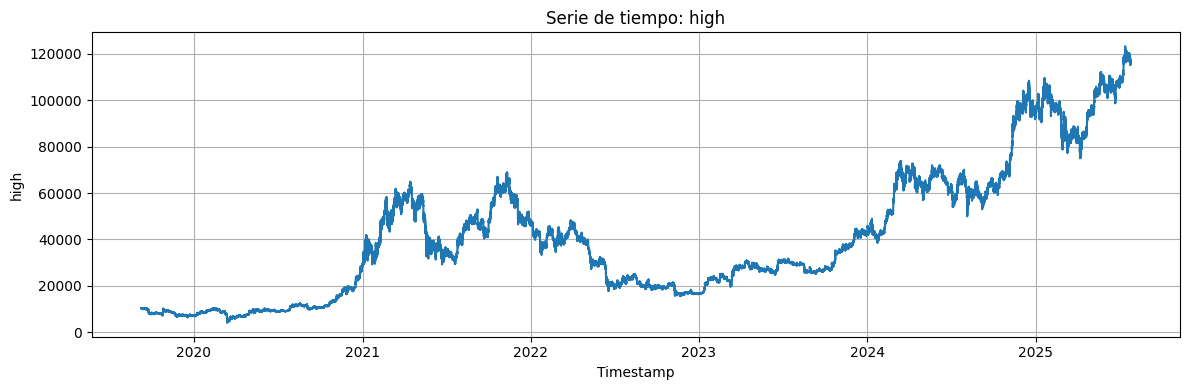

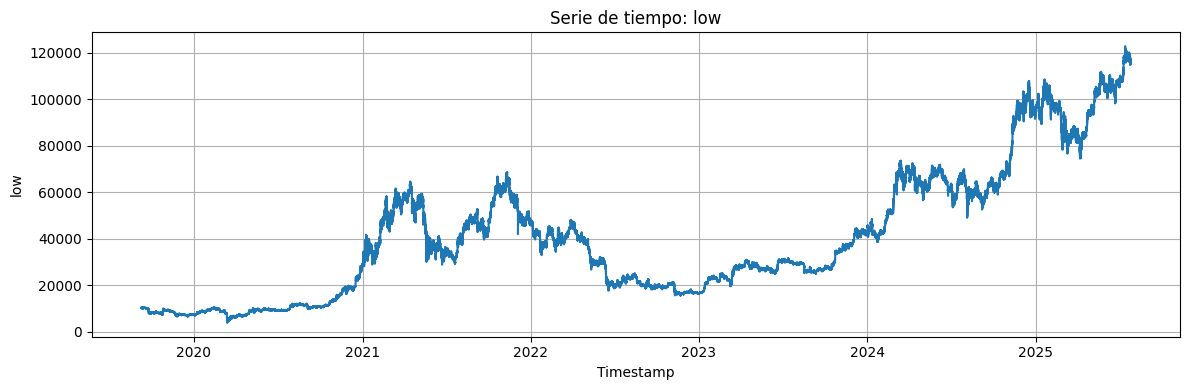

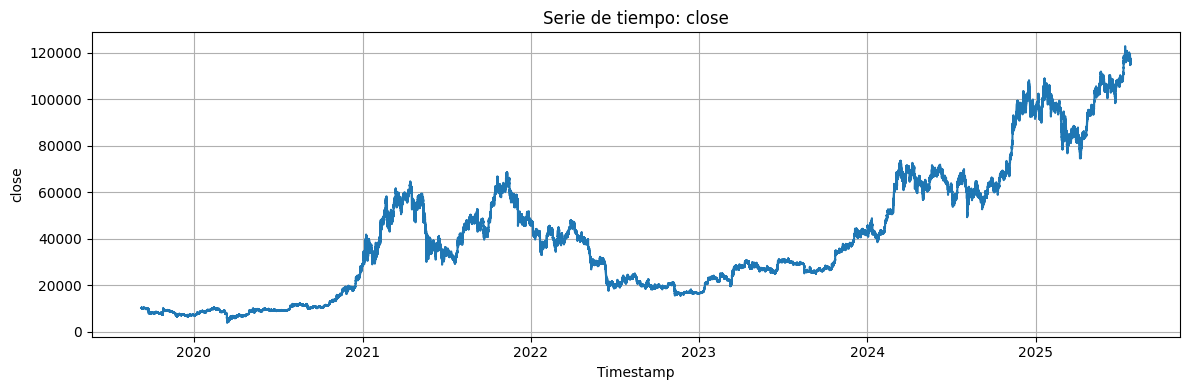

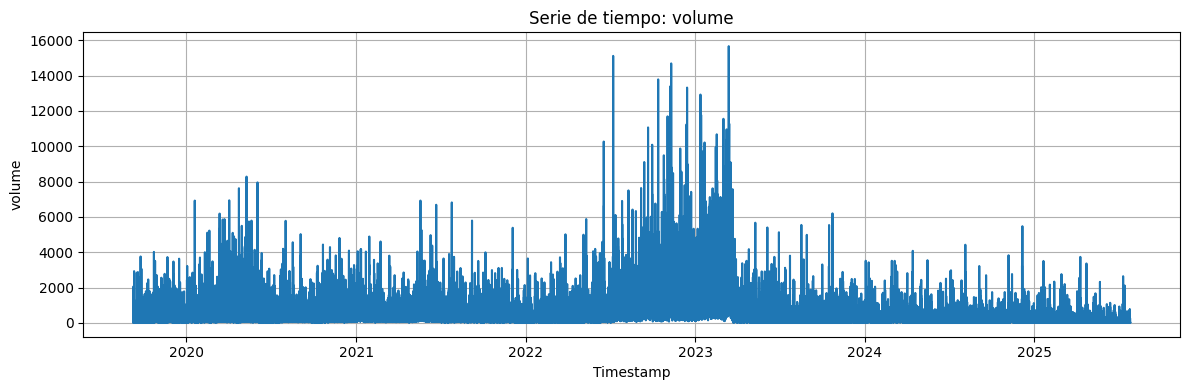

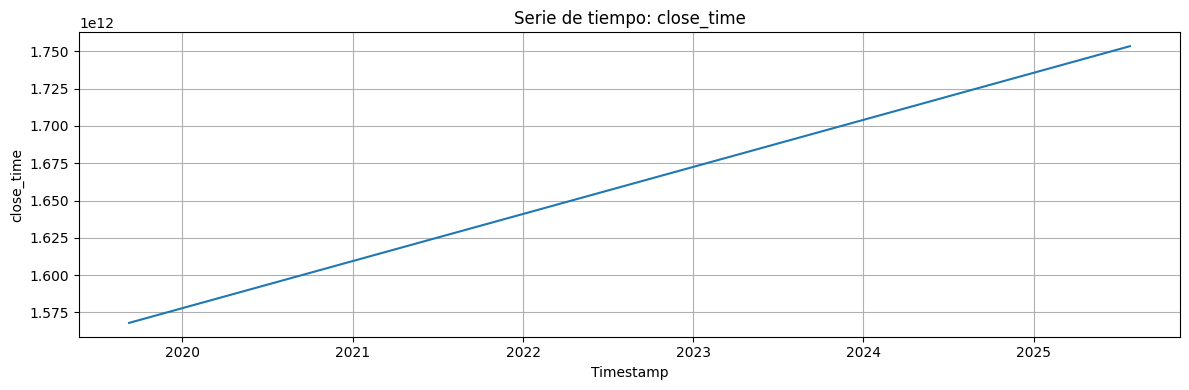

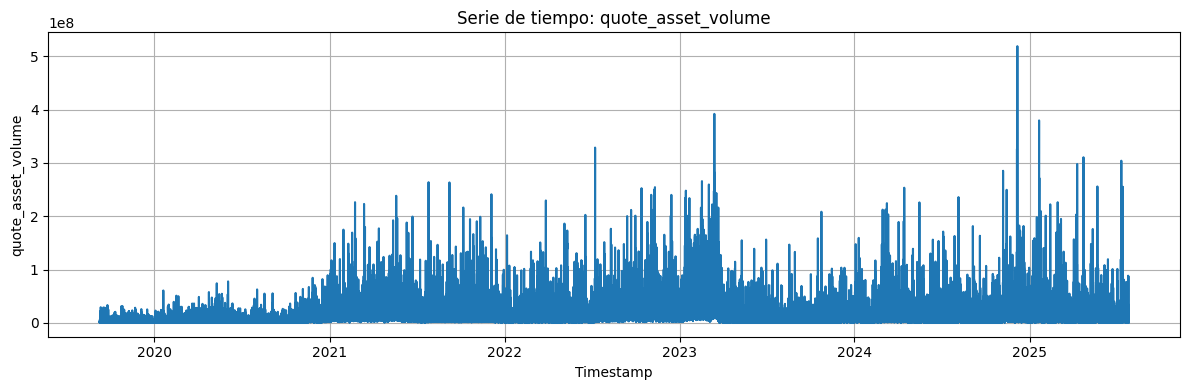

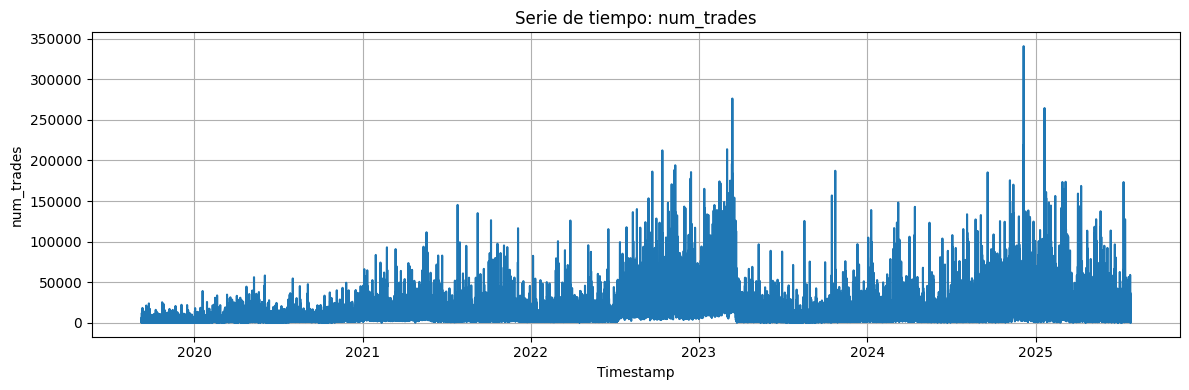

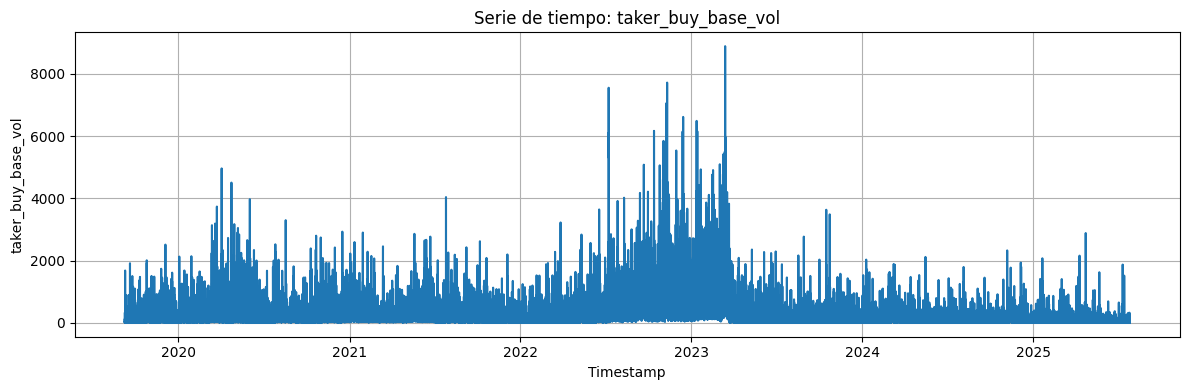

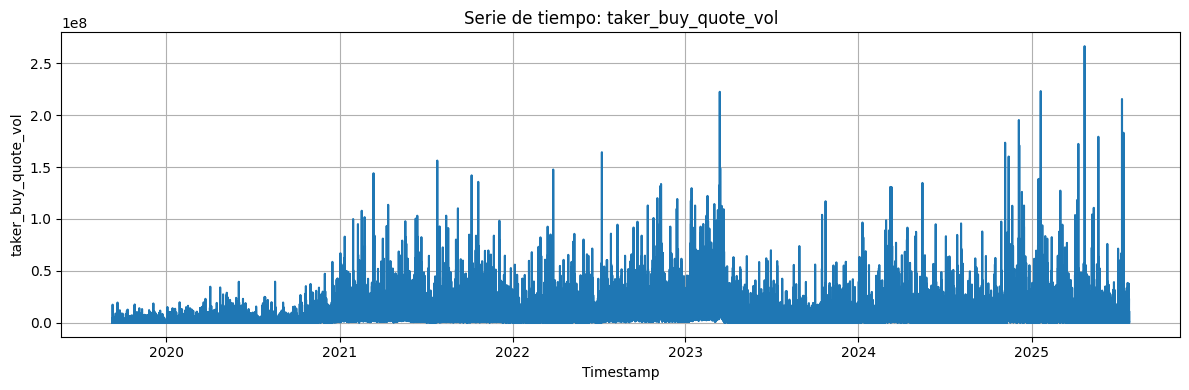

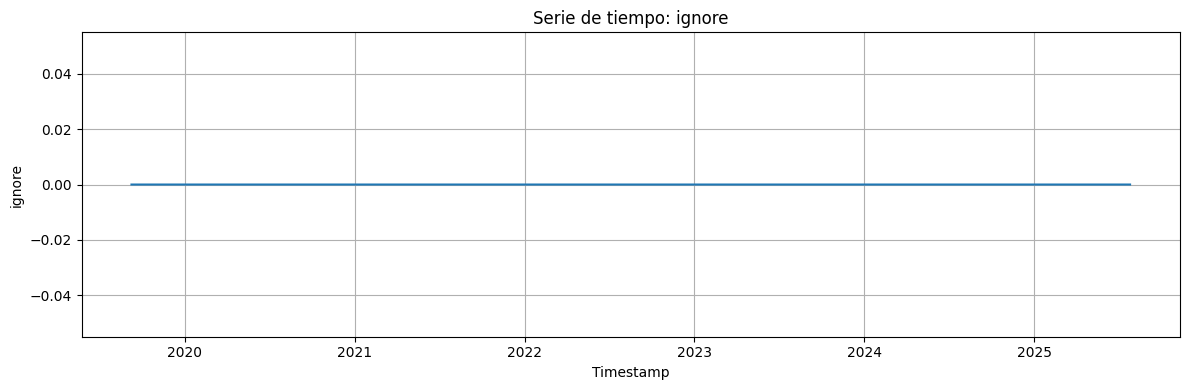

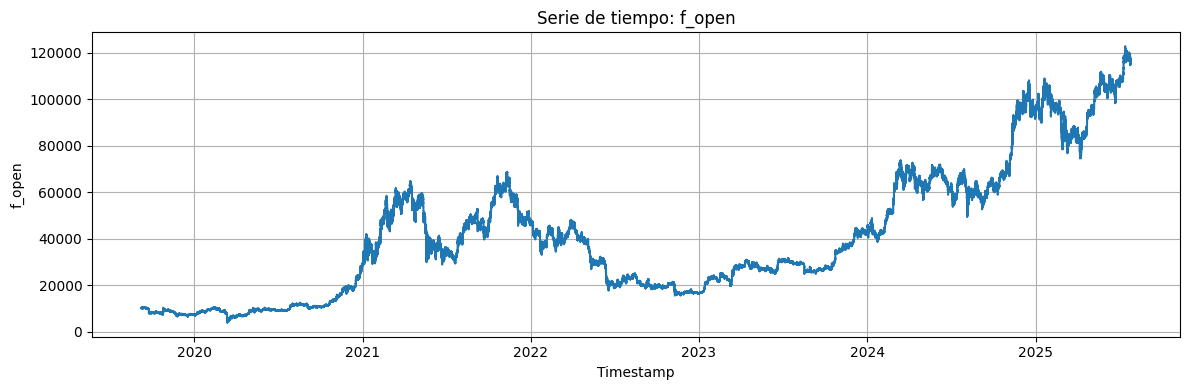

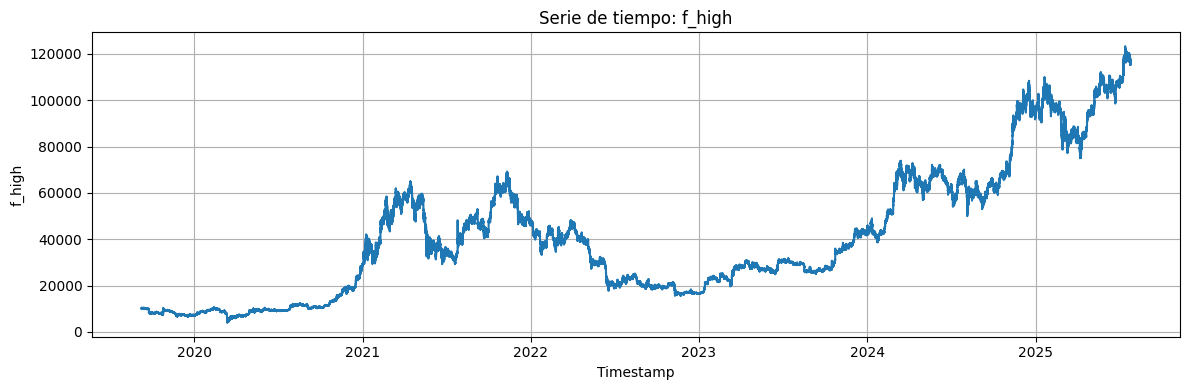

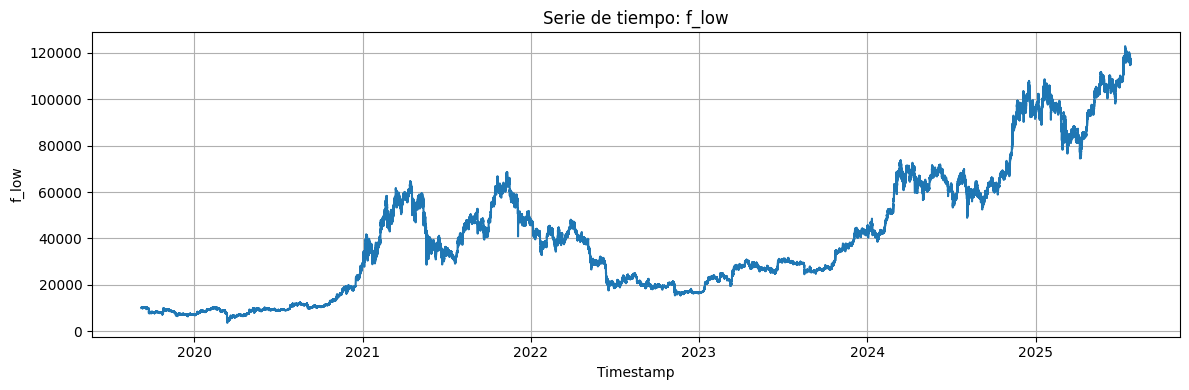

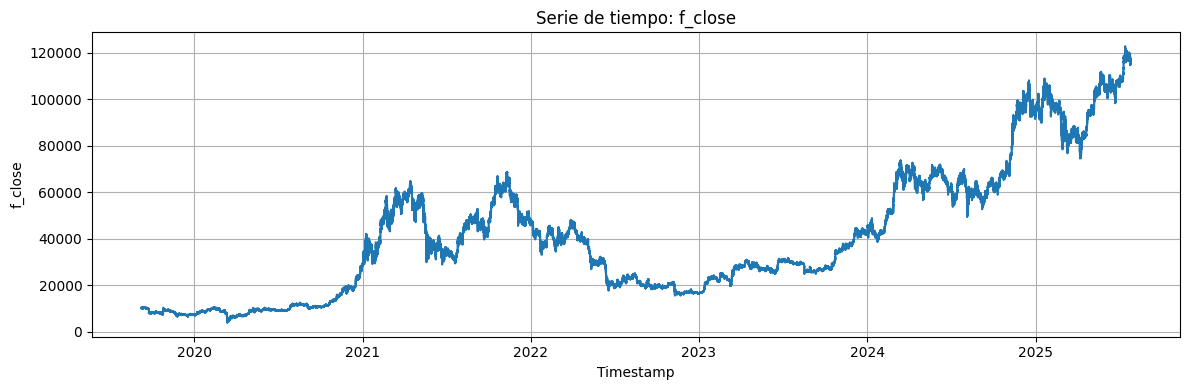

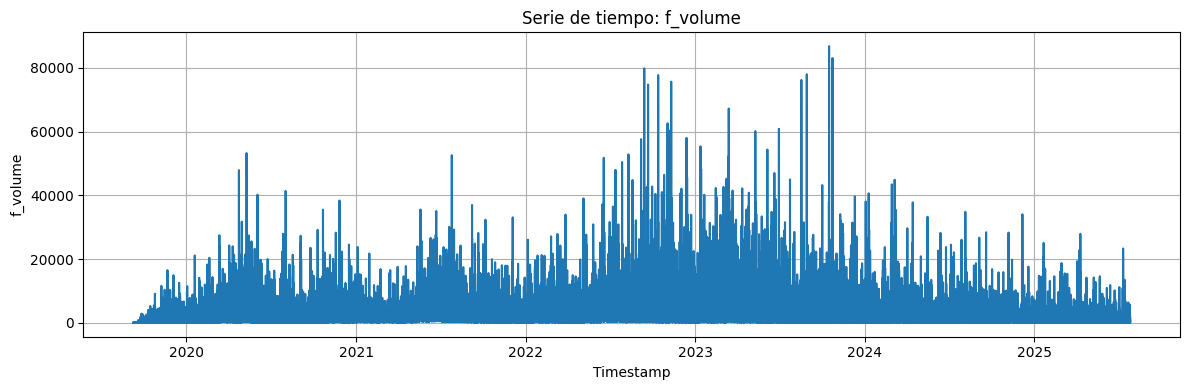

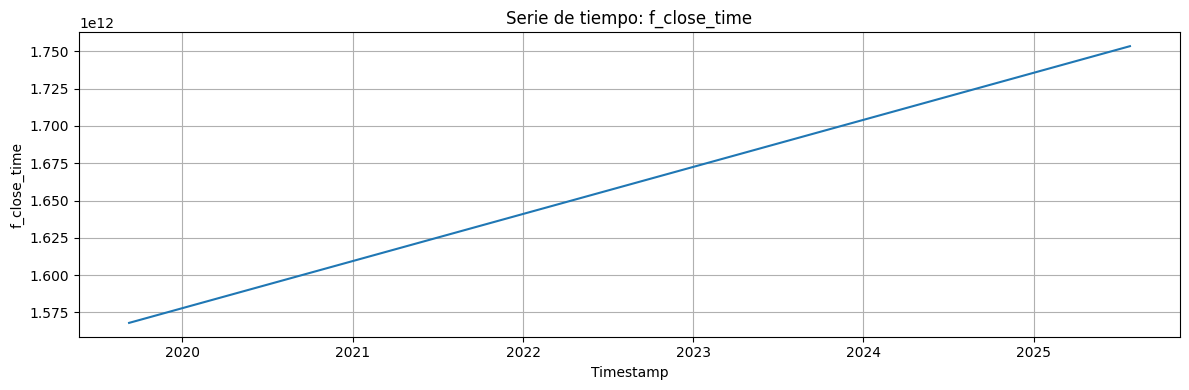

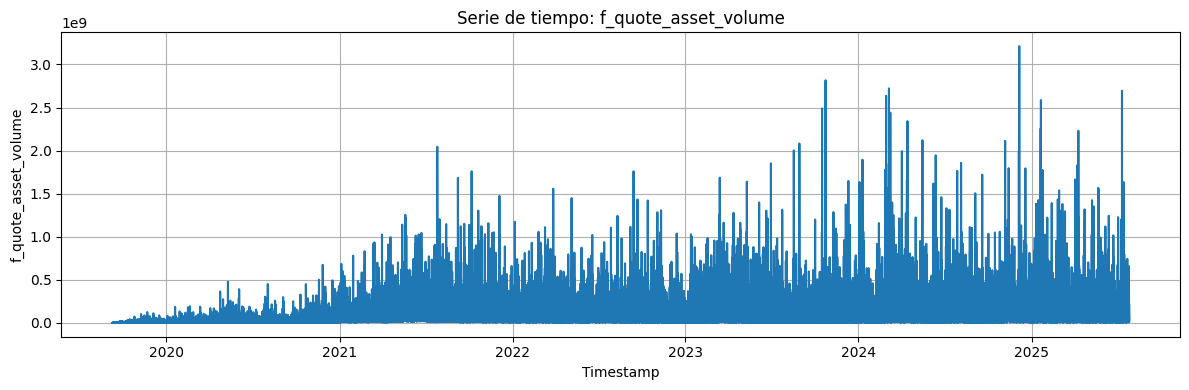

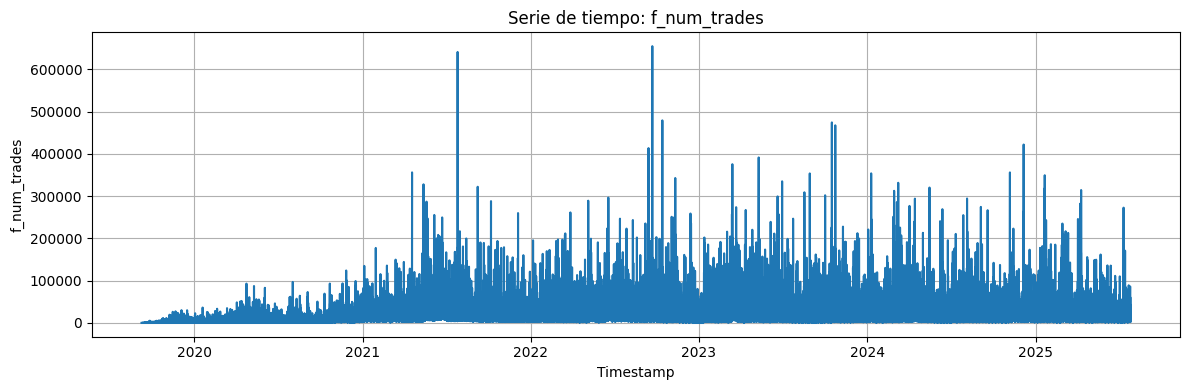

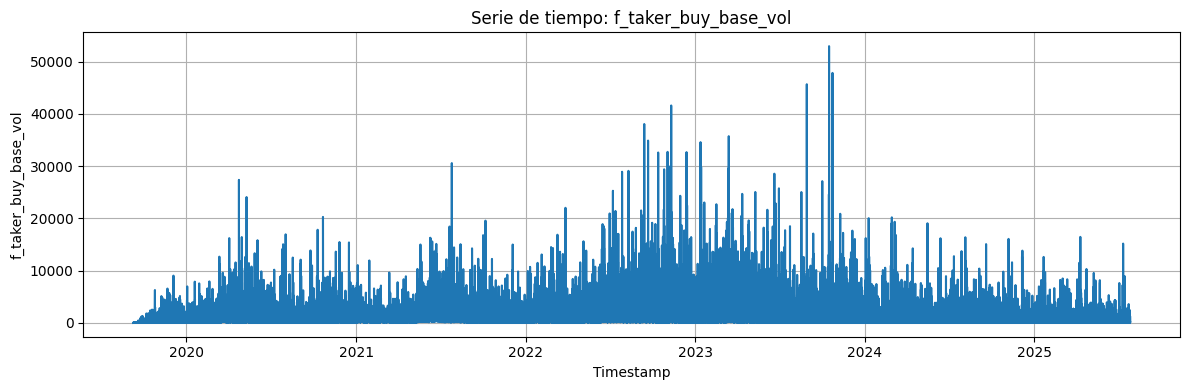

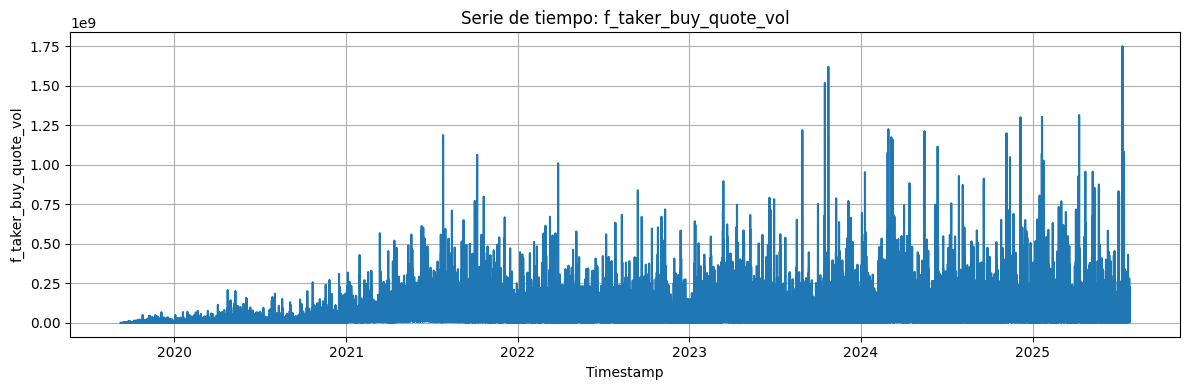

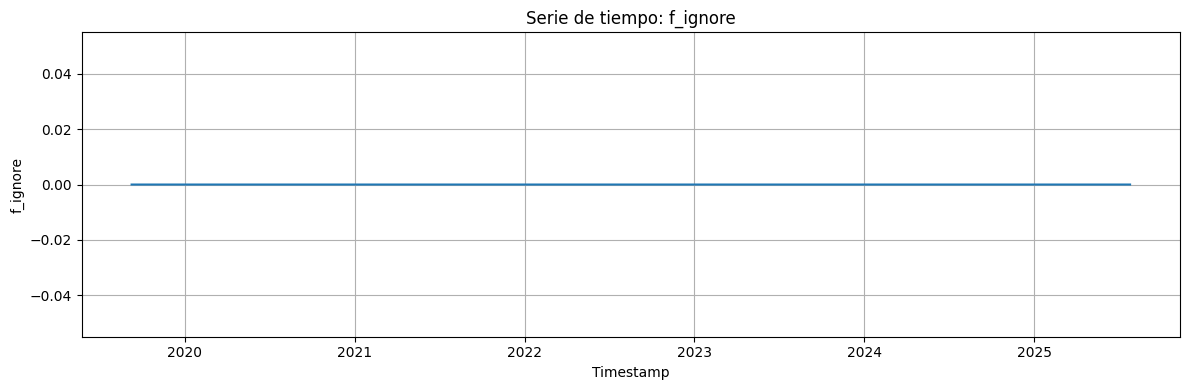

In [25]:
import matplotlib.pyplot as plt

# Excluir la columna 'timestamp' (columna 0)
cols = mf.columns[1:]

# Número de filas (por si querés limitar N más adelante)
N = mf.shape[0]

# Para cada columna, graficar su serie por separado
for col in cols:
    plt.figure(figsize=(12, 4))
    plt.plot(mf['timestamp'][:N], mf[col][:N])
    plt.title(f'Serie de tiempo: {col}')
    plt.xlabel('Timestamp')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


---

# Y

CREACION BINARIA BITCOIN

Y

In [6]:
delta = mf['close'].shift(-3) - mf['close']
tolerancia = mf['close'] * 0.0001

mf['Y1_1'] = np.select(
    condlist=[
        delta > tolerancia,                          # Subida
        delta <= tolerancia,
    ],
    choicelist=[0, 1],
    default=np.nan
)

In [7]:
# Ver el conteo de observaciones por clase en B1
conteo_clases = mf['Y1_1'].value_counts(dropna=False)
print(conteo_clases)

Y1_1
1.0    321655
0.0    296236
NaN         3
Name: count, dtype: int64


B1

In [8]:
delta = mf['close'].shift(3) - mf['close']
tolerancia = mf['close'] * 0.0001

mf['B1'] = np.select(
    condlist=[
        delta > tolerancia,                          # Subida
        delta <= tolerancia,
    ],
    choicelist=[0, 1],
    default=np.nan
)

In [9]:
# Ver el conteo de observaciones por clase en B1
conteo_clases = mf['B1'].value_counts(dropna=False)
print(conteo_clases)

B1
1.0    325338
0.0    292553
NaN         3
Name: count, dtype: int64


RB

In [10]:
import numpy as np

# Generar ruido blanco con media 0 y desviación estándar 1
np.random.seed(42)  # Para reproducibilidad
mf['RB'] = np.random.normal(loc=0, scale=1, size=len(mf))

#c2

In [11]:
mf["c2"] = mf["close"].diff()

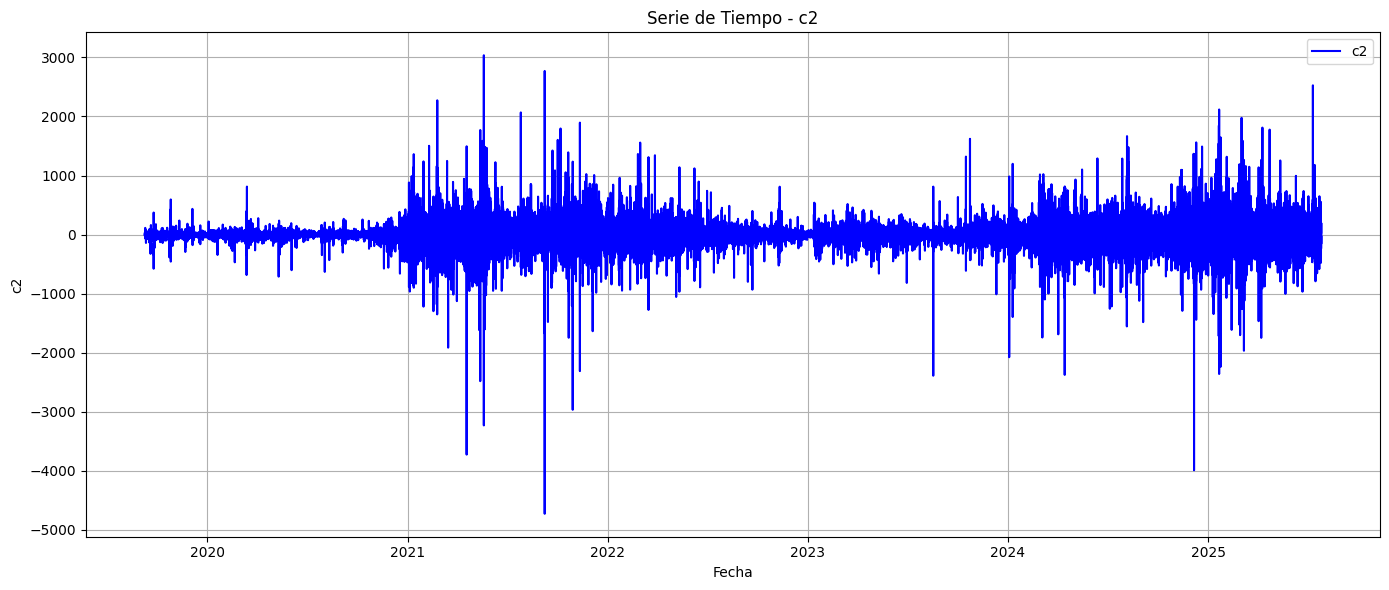

In [20]:
plt.figure(figsize=(14, 6))
plt.plot(mf["timestamp"], mf["c2"], label="c2", color="blue")
plt.title("Serie de Tiempo - c2")
plt.xlabel("Fecha")
plt.ylabel("c2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

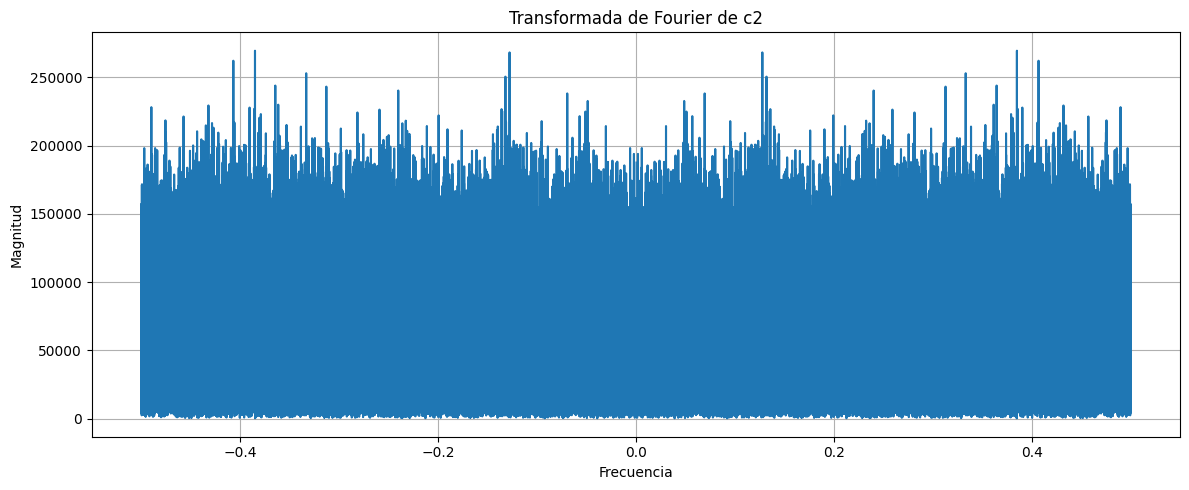

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de eliminar NaNs (por diff y shift)
c2_clean = mf['c2'].dropna()

# Aplicar la transformada de Fourier
fft_c2 = np.fft.fft(c2_clean)
freqs = np.fft.fftfreq(len(c2_clean))

# Magnitud del espectro
magnitude = np.absolute(fft_c2)

# Graficar el espectro
plt.figure(figsize=(12, 5))
plt.plot(freqs, magnitude)
plt.title('Transformada de Fourier de c2')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid(True)
plt.tight_layout()
plt.show()

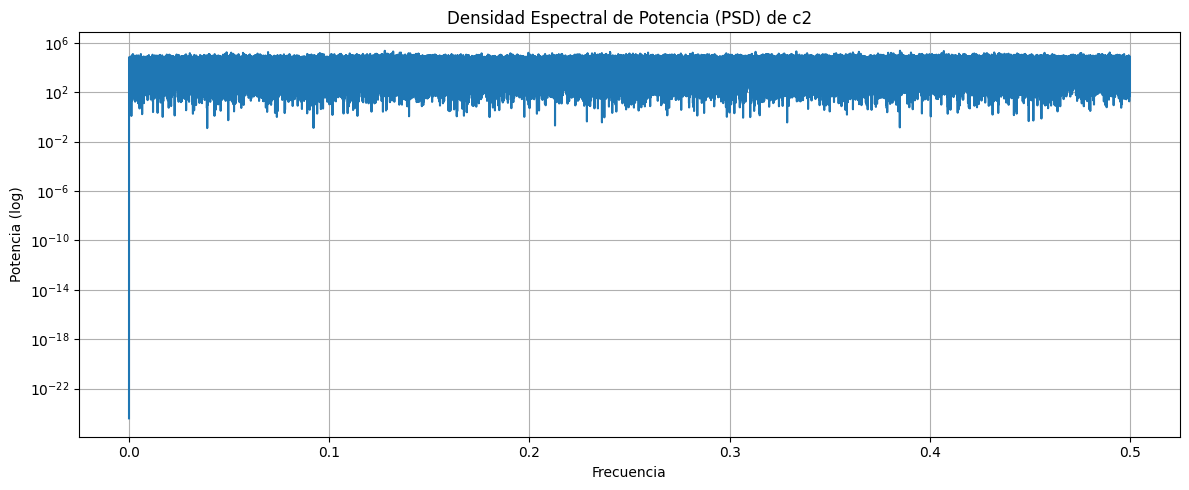

<Figure size 1200x500 with 0 Axes>

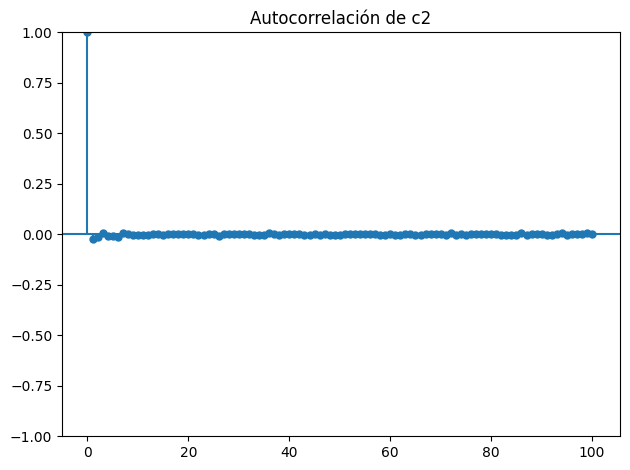

In [23]:
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

# 1. Limpiar la serie
m2_clean = mf["c2"].dropna()
N = len(m2_clean)

# 2. PSD: Densidad Espectral de Potencia
freqs, psd = periodogram(m2_clean, fs=1)  # fs=1: frecuencia de muestreo si es por pasos iguales

plt.figure(figsize=(12, 5))
plt.semilogy(freqs, psd)
plt.title("Densidad Espectral de Potencia (PSD) de c2")
plt.xlabel("Frecuencia")
plt.ylabel("Potencia (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Autocorrelación (con hasta 100 lags por ejemplo)
plt.figure(figsize=(12, 5))
plot_acf(m2_clean, lags=100, title="Autocorrelación de c2")
plt.tight_layout()
plt.show()


NO TIENE SENTIDO TRABAJAR CON LM2 OD NADA MAS PORQUE VEMOS QUE TANTO EN EL TEST DE AUTO CORRELACION COMO EN EL ANALSIS DE DENSISDAD DE ENEGERGIA EN FRECUENCIAS,SE PARECE MUCHO AL RUIDO BLANCO:

Por lo que se procese a analizar momentums sobre las EMAS DE CLOSE, pues estan son un esquma suavizado de la vairable bajo estudio

#MOM

In [12]:
mf["m2"] = mf["close"].diff()/mf["close"].shift(1)

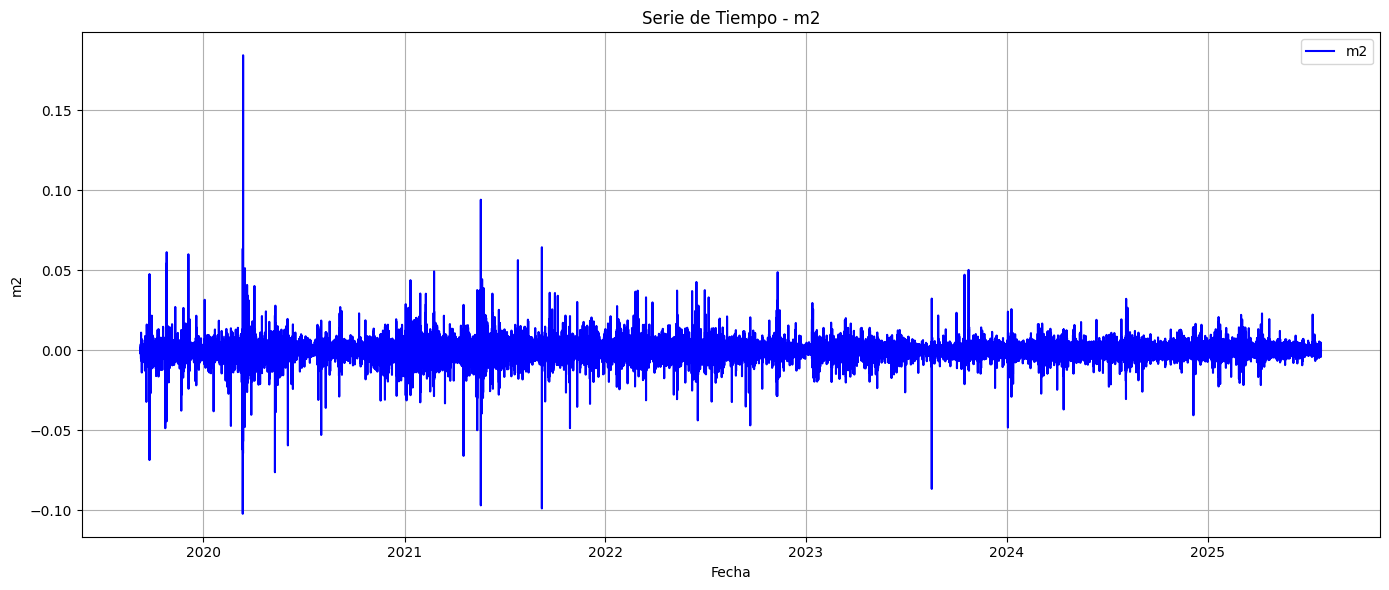

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(mf["timestamp"], mf["m2"], label="m2", color="blue")
plt.title("Serie de Tiempo - m2")
plt.xlabel("Fecha")
plt.ylabel("m2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

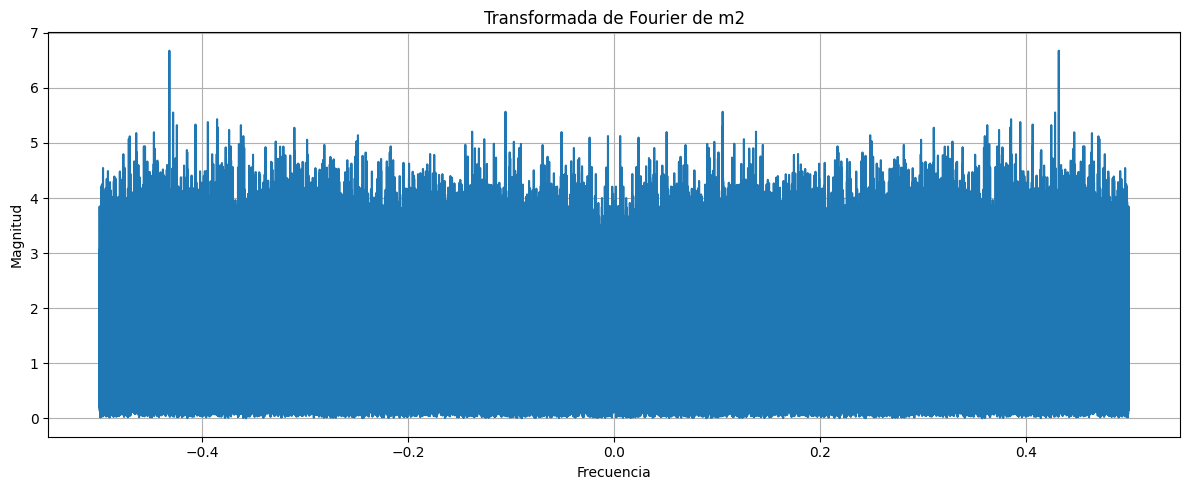

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de eliminar NaNs (por diff y shift)
m2_clean = mf['m2'].dropna()

# Aplicar la transformada de Fourier
fft_m2 = np.fft.fft(m2_clean)
freqs = np.fft.fftfreq(len(m2_clean))

# Magnitud del espectro
magnitude = np.absolute(fft_m2)

# Graficar el espectro
plt.figure(figsize=(12, 5))
plt.plot(freqs, magnitude)
plt.title('Transformada de Fourier de m2')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
mf.loc[m2_clean.index, 'magnitude'] = magnitude
mf.loc[m2_clean.index, 'freqs'] = freqs

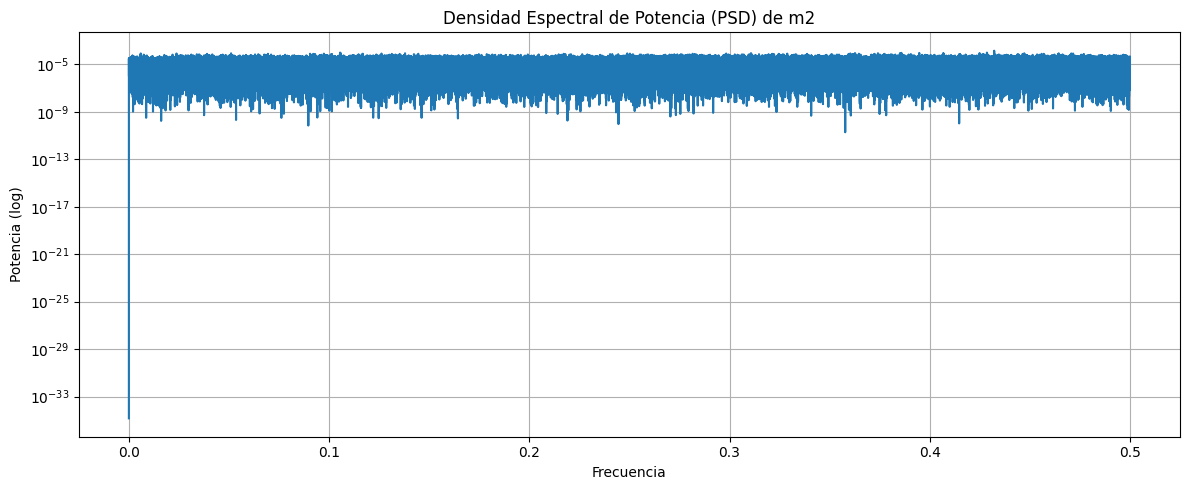

<Figure size 1200x500 with 0 Axes>

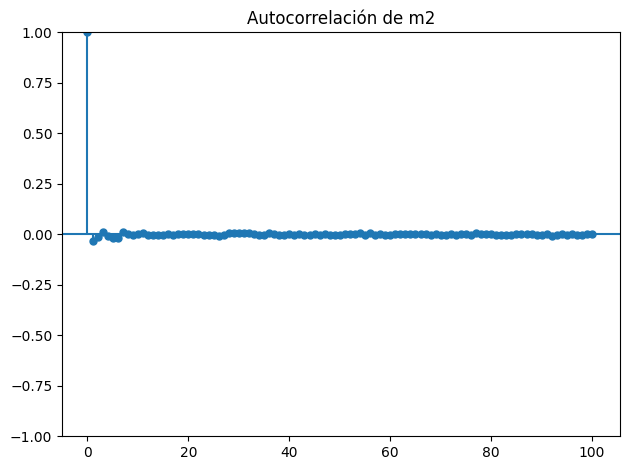

In [ ]:
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

# 1. Limpiar la serie
m2_clean = mf["m2"].dropna()
N = len(m2_clean)

# 2. PSD: Densidad Espectral de Potencia
freqs, psd = periodogram(m2_clean, fs=1)  # fs=1: frecuencia de muestreo si es por pasos iguales

plt.figure(figsize=(12, 5))
plt.semilogy(freqs, psd)
plt.title("Densidad Espectral de Potencia (PSD) de m2")
plt.xlabel("Frecuencia")
plt.ylabel("Potencia (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Autocorrelación (con hasta 100 lags por ejemplo)
plt.figure(figsize=(12, 5))
plot_acf(m2_clean, lags=100, title="Autocorrelación de m2")
plt.tight_layout()
plt.show()


In [55]:
import numpy as np
import pandas as pd

# Crear la columna vacía
mf["m2_tf_freq"] = np.nan

# Parámetros
window = 100800
min_periods = 10000

# Rolling personalizado
for i in range(min_periods, len(mf)):
    if i < window:
        data = mf['m2'].iloc[0:i].dropna()
    else:
        data = mf['m2'].iloc[i-window:i].dropna()

    # Saltar si no hay suficientes datos
    if len(data) < min_periods:
        continue

    # FFT y frecuencias
    fft_vals = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(data))
    magnitudes = np.abs(fft_vals)

    # Buscar frecuencia con máxima magnitud (sin contar la frecuencia 0)
    freqs_nonzero = freqs[freqs != 0]
    magnitudes_nonzero = magnitudes[freqs != 0]
    dominant_freq = freqs_nonzero[np.argmax(magnitudes_nonzero)]

    # Guardar resultado
    mf.at[data.index[-1], "m2_tf_freq"] = dominant_freq

In [59]:
# same as before

# mi:
#    Variable  Mutual Information
# 0       freqs            0.179804     #leakege
# 6          B1            0.056158
# 2   magnitude            0.001342
# 4          m2            0.001075
# 1  m2_tf_freq            0.000846
# 3          c2            0.000276
# 5          RB            0.000000


# Procedemos a trabajar con las siguientes opciones:
# - mom log x
# - mom sobre EMAn
# - mom sobre diferentes horizontes temporales

#MOM_2

In [13]:
mf["dm2"] = mf["m2"].diff()

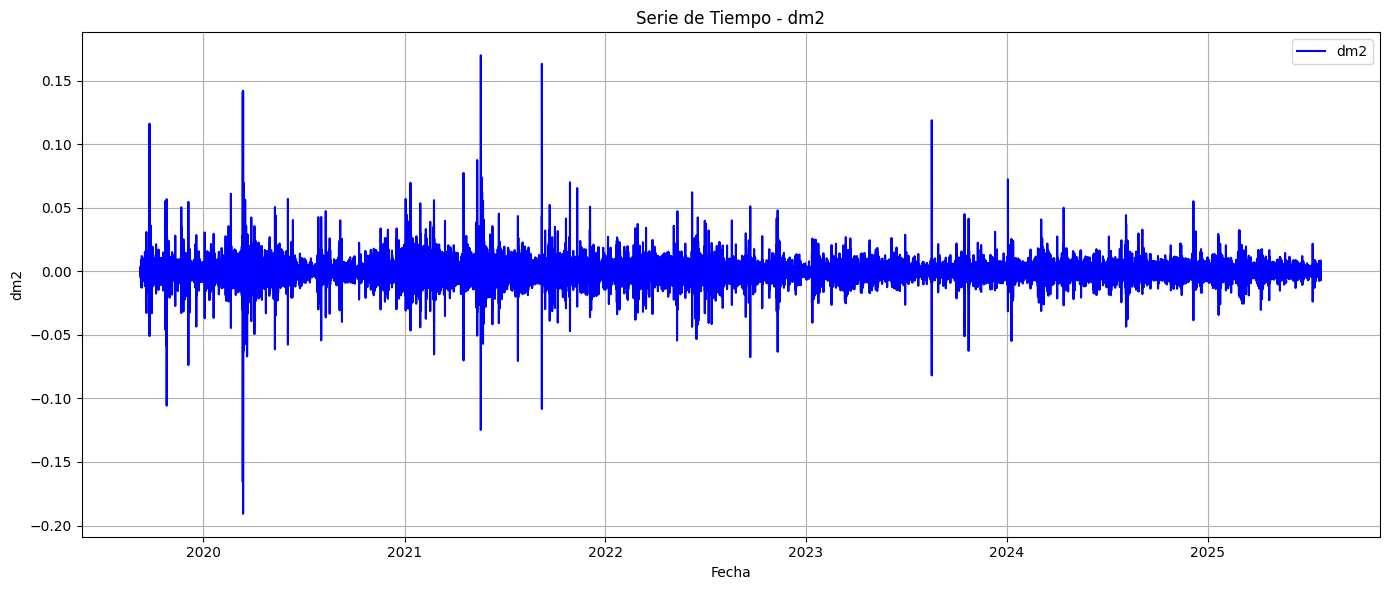

In [73]:
plt.figure(figsize=(14, 6))
plt.plot(mf["timestamp"], mf["dm2"], label="dm2", color="blue")
plt.title("Serie de Tiempo - dm2")
plt.xlabel("Fecha")
plt.ylabel("dm2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

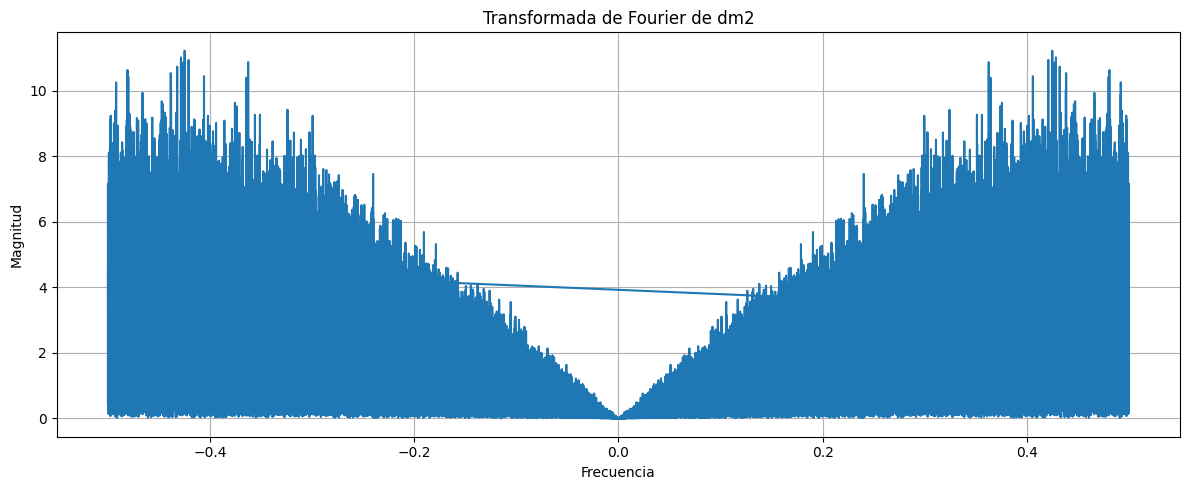

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de eliminar NaNs (por diff y shift)
m2_clean = mf['dm2'].dropna()

# Aplicar la transformada de Fourier
fft_m2 = np.fft.fft(m2_clean)
freqs = np.fft.fftfreq(len(m2_clean))

# Magnitud del espectro
magnitude = np.absolute(fft_m2)

# Graficar el espectro
plt.figure(figsize=(12, 5))
plt.plot(freqs, magnitude)
plt.title('Transformada de Fourier de dm2')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
mf.loc[m2_clean.index, 'magnitude'] = magnitude
mf.loc[m2_clean.index, 'freqs'] = freqs

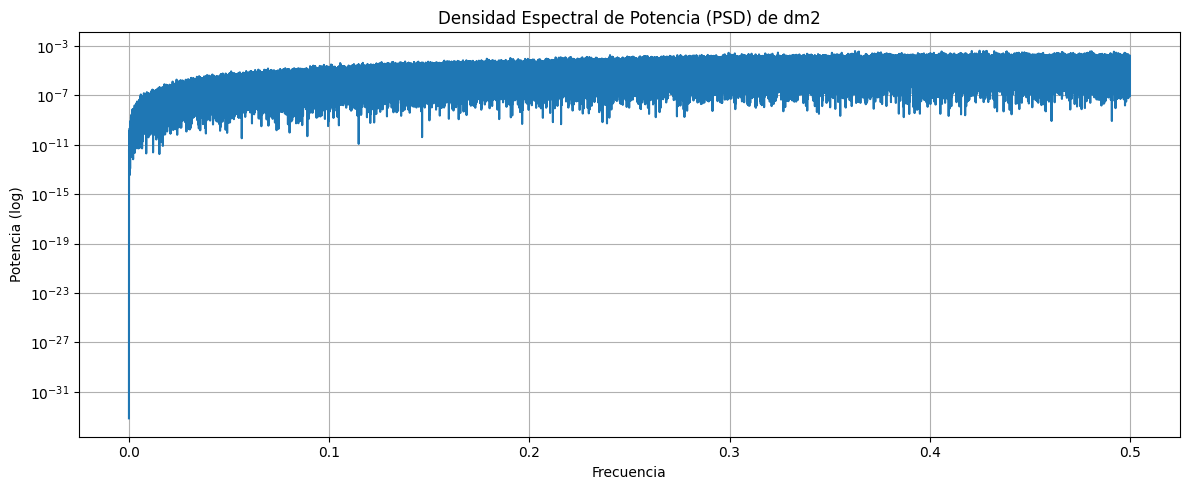

<Figure size 1200x500 with 0 Axes>

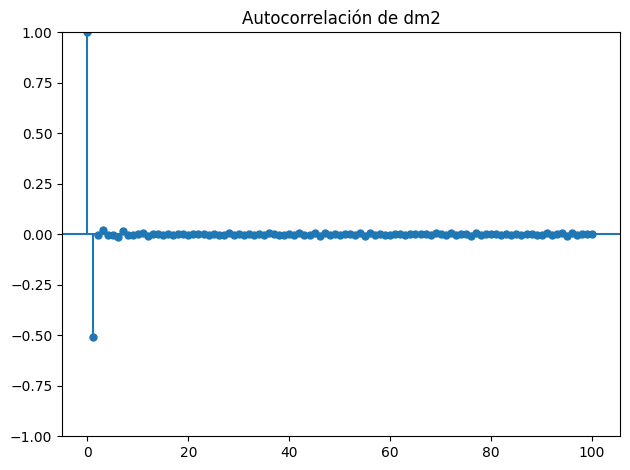

In [75]:
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

# 1. Limpiar la serie
m2_clean = mf["dm2"].dropna()
N = len(m2_clean)

# 2. PSD: Densidad Espectral de Potencia
freqs, psd = periodogram(m2_clean, fs=1)  # fs=1: frecuencia de muestreo si es por pasos iguales

plt.figure(figsize=(12, 5))
plt.semilogy(freqs, psd)
plt.title("Densidad Espectral de Potencia (PSD) de dm2")
plt.xlabel("Frecuencia")
plt.ylabel("Potencia (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Autocorrelación (con hasta 100 lags por ejemplo)
plt.figure(figsize=(12, 5))
plot_acf(m2_clean, lags=100, title="Autocorrelación de dm2")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Crear la columna vacía
mf["m2_tf_freq"] = np.nan

# Parámetros
window = 100800
min_periods = 10000

# Rolling personalizado
for i in range(min_periods, len(mf)):
    if i < window:
        data = mf['m2'].iloc[0:i].dropna()
    else:
        data = mf['m2'].iloc[i-window:i].dropna()

    # Saltar si no hay suficientes datos
    if len(data) < min_periods:
        continue

    # FFT y frecuencias
    fft_vals = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(data))
    magnitudes = np.abs(fft_vals)

    # Buscar frecuencia con máxima magnitud (sin contar la frecuencia 0)
    freqs_nonzero = freqs[freqs != 0]
    magnitudes_nonzero = magnitudes[freqs != 0]
    dominant_freq = freqs_nonzero[np.argmax(magnitudes_nonzero)]

    # Guardar resultado
    mf.at[data.index[-1], "m2_tf_freq"] = dominant_freq

In [ ]:
# same as before

# mi:
#    Variable  Mutual Information
# 0       freqs            0.179804     #leakege
# 6          B1            0.056158
# 2   magnitude            0.001342
# 4          m2            0.001075
# 1  m2_tf_freq            0.000846
# 3          c2            0.000276
# 5          RB            0.000000


# Procedemos a trabajar con las siguientes opciones:
# - mom log x
# - mom sobre EMAn
# - mom sobre diferentes horizontes temporales

In [76]:
mf["jerk_std_5"] = mf["dm2"].rolling(5).std()
mf["jerk_mean_5"] = mf["dm2"].abs().rolling(5).mean()

#MOM szd Ln

In [15]:
mf["lclose"] = np.log(mf["close"])

In [61]:
mf["lm2"] = mf["lclose"].diff()/mf["lclose"].shift(1)

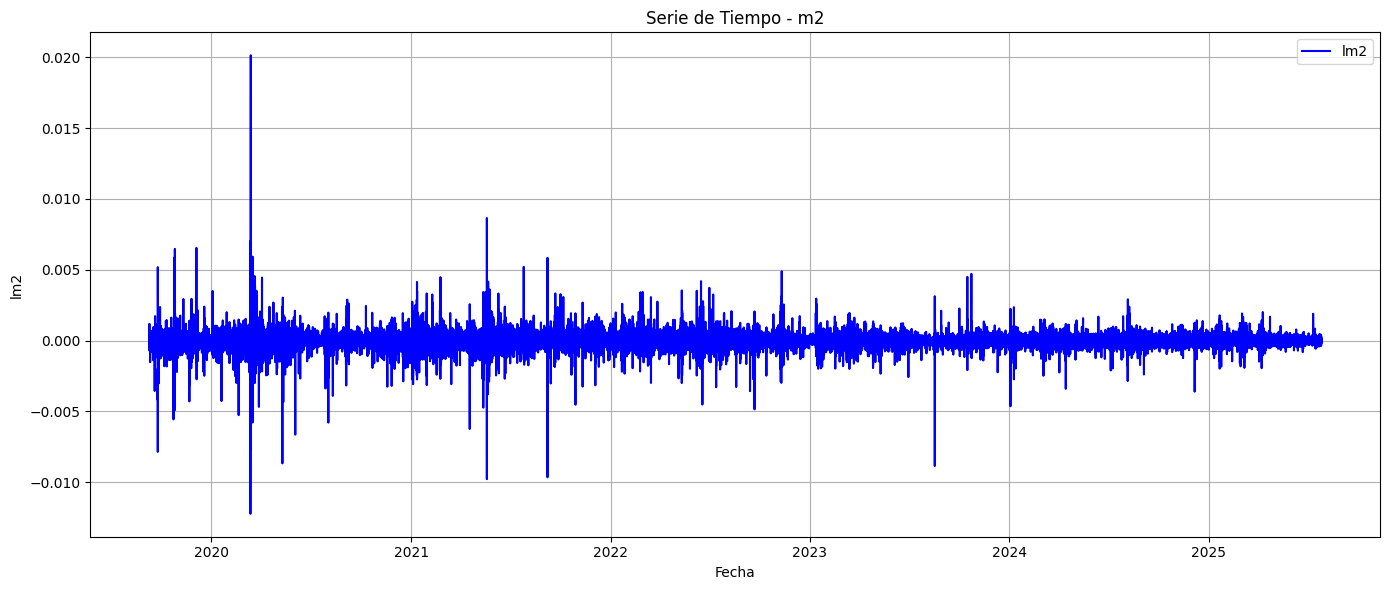

In [62]:
plt.figure(figsize=(14, 6))
plt.plot(mf["timestamp"], mf["lm2"], label="lm2", color="blue")
plt.title("Serie de Tiempo - m2")
plt.xlabel("Fecha")
plt.ylabel("lm2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

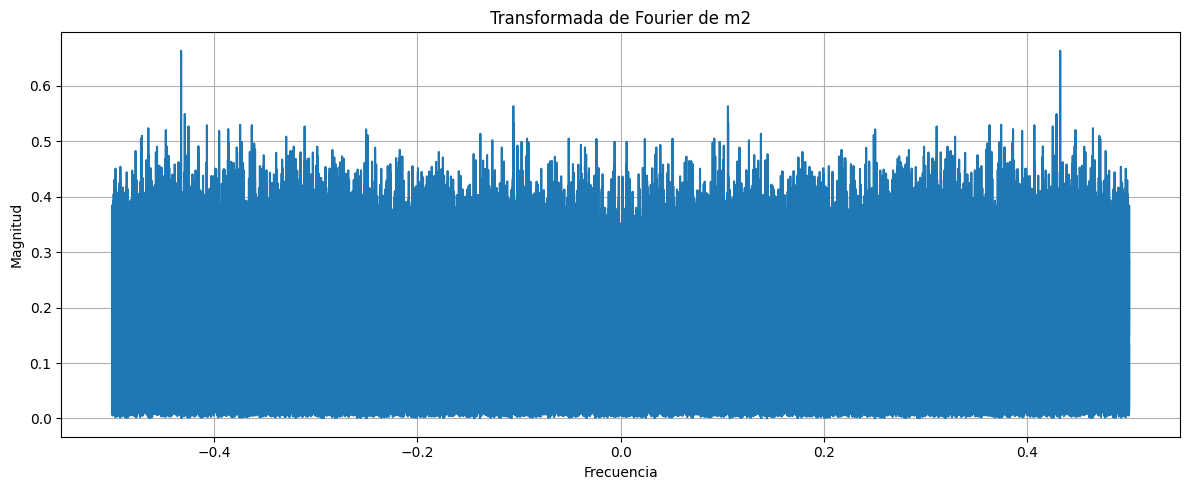

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de eliminar NaNs (por diff y shift)
m2_clean = mf['lm2'].dropna()

# Aplicar la transformada de Fourier
fft_m2 = np.fft.fft(m2_clean)
freqs = np.fft.fftfreq(len(m2_clean))

# Magnitud del espectro
magnitude = np.absolute(fft_m2)

# Graficar el espectro
plt.figure(figsize=(12, 5))
plt.plot(freqs, magnitude)
plt.title('Transformada de Fourier de m2')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid(True)
plt.tight_layout()
plt.show()

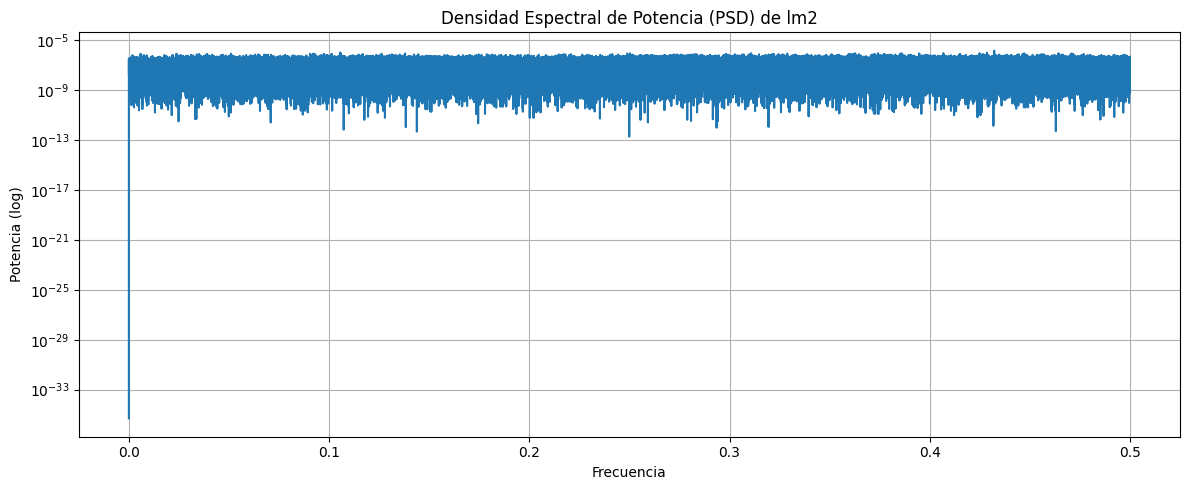

<Figure size 1200x500 with 0 Axes>

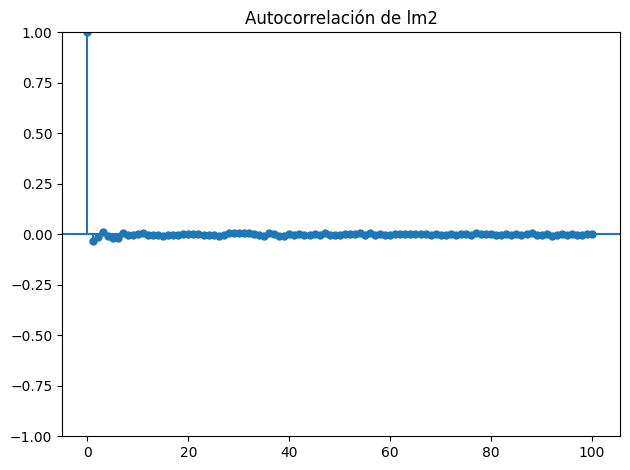

In [65]:
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

# 1. Limpiar la serie
m2_clean = mf["lm2"].dropna()
N = len(m2_clean)

# 2. PSD: Densidad Espectral de Potencia
freqs, psd = periodogram(m2_clean, fs=1)  # fs=1: frecuencia de muestreo si es por pasos iguales

plt.figure(figsize=(12, 5))
plt.semilogy(freqs, psd)
plt.title("Densidad Espectral de Potencia (PSD) de lm2")
plt.xlabel("Frecuencia")
plt.ylabel("Potencia (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Autocorrelación (con hasta 100 lags por ejemplo)
plt.figure(figsize=(12, 5))
plot_acf(m2_clean, lags=100, title="Autocorrelación de lm2")
plt.tight_layout()
plt.show()


In [66]:
import numpy as np
import pandas as pd

# Crear la columna vacía
mf["lm2_tf_freq"] = np.nan

# Parámetros
window = 100800
min_periods = 10000

# Rolling personalizado
for i in range(min_periods, len(mf)):
    if i < window:
        data = mf['lm2'].iloc[0:i].dropna()
    else:
        data = mf['lm2'].iloc[i-window:i].dropna()

    # Saltar si no hay suficientes datos
    if len(data) < min_periods:
        continue

    # FFT y frecuencias
    fft_vals = np.fft.fft(data)
    freqs = np.fft.fftfreq(len(data))
    magnitudes = np.abs(fft_vals)

    # Buscar frecuencia con máxima magnitud (sin contar la frecuencia 0)
    freqs_nonzero = freqs[freqs != 0]
    magnitudes_nonzero = magnitudes[freqs != 0]
    dominant_freq = freqs_nonzero[np.argmax(magnitudes_nonzero)]

    # Guardar resultado
    mf.at[data.index[-1], "lm2_tf_freq"] = dominant_freq

In [ ]:
# No tiene sentido trabajar con m2, porque observando el test de autocorrelacion
# y el PSD se parece mucho al ruido balnco

# Por otro lado, al tomar las frecuencias del FT de mom pillamos que limpio de
# leakage tiene una relacion estadisiticamente insignificante.
# Lo anterior que confirma lo que se aprecio en la observacion de PSD y autocorrelacion.

# mi:
# Variable  Mutual Information
# 0        freqs            0.179684
# 7           B1            0.057000
# 3    magnitude            0.001450
# 5           m2            0.001059
# 4           c2            0.000935
# 2  lm2_tf_freq            0.000895
# 1   m2_tf_freq            0.000000
# 6           RB            0.000000


# Procedemos a trabajar con las siguientes opciones:
# - mom log x
# - mom sobre EMAn
# - mom sobre diferentes horizontes temporales

#MOM suavizado EMAs

In [16]:
ema_spans = {
    "10": 2,
    "15": 3,
    "30": 6,
    "1h": 12,
    "2h": 24,
    "4h": 48,
    "6h": 72,
    "12h": 144,
    "1d": 288,
    "3d": 864,
    "4d": 1152,
    "5d": 1440,
    "1s": 2016,
    "2s": 4032,
    "1m": 8064,
    "2m": 16128,
    "3m": 24192,
    "4m": 32256,
    "5m": 40320,
    "6m": 48384,
    "9m": 72576,
    "1a": 100800,
    "2a": 201600,
    "3a": 302400
}

# Calcular cada EMA
for label, span in ema_spans.items():
    mf[f"EMA_{label}"] = mf["close"].ewm(span=span, adjust=False).mean()


In [56]:
print(mf.columns.tolist())

['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'num_trades', 'taker_buy_base_vol', 'taker_buy_quote_vol', 'ignore', 'f_open', 'f_high', 'f_low', 'f_close', 'f_volume', 'f_close_time', 'f_quote_asset_volume', 'f_num_trades', 'f_taker_buy_base_vol', 'f_taker_buy_quote_vol', 'f_ignore', 'm2', 'EMA_10', 'EMA_15', 'EMA_30', 'EMA_1h', 'EMA_2h', 'EMA_4h', 'EMA_6h', 'EMA_12h', 'EMA_1d', 'EMA_3d', 'EMA_4d', 'EMA_5d', 'EMA_1s', 'EMA_2s', 'EMA_1m', 'EMA_2m', 'EMA_3m', 'EMA_4m', 'EMA_5m', 'EMA_6m', 'EMA_9m', 'EMA_1a', 'EMA_2a', 'EMA_3a', 'm2_ema10', 'c2', 'm2_ema15', 'm2_ema30', 'm2_ema1h', 'm2_ema2h', 'Y1_1', 'B1', 'RB', 'magnitude', 'freqs', 'm2_tf_freq']


EMA_10

In [17]:
mf["m2_ema10"] = (mf["EMA_10"] - mf["EMA_10"].shift(1)) / mf["EMA_10"].shift(1)

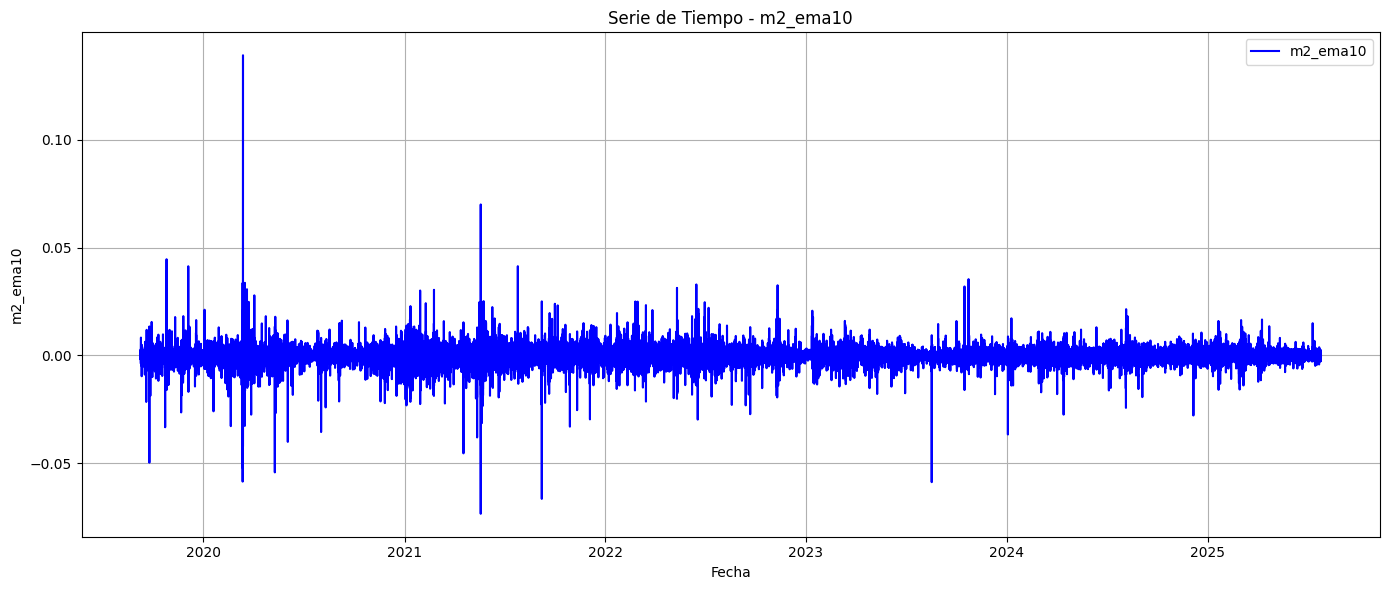

In [16]:
plt.figure(figsize=(14, 6))
plt.plot(mf["timestamp"], mf["m2_ema10"], label="m2_ema10", color="blue")
plt.title("Serie de Tiempo - m2_ema10")
plt.xlabel("Fecha")
plt.ylabel("m2_ema10")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

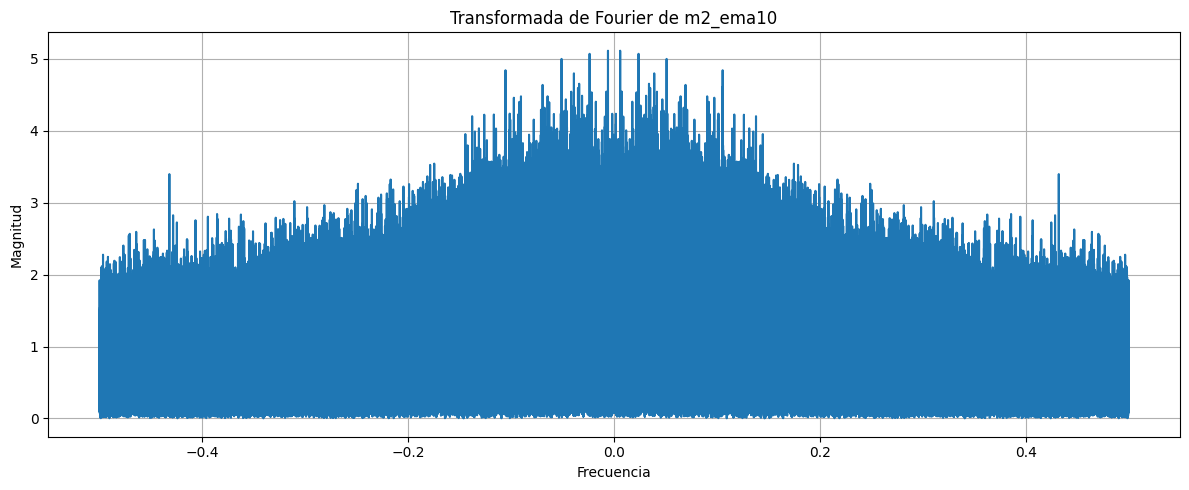

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de eliminar NaNs (por diff y shift)
m2_ema10_clean = mf['m2_ema10'].dropna()

# Aplicar la transformada de Fourier
fft_m2_ema10 = np.fft.fft(m2_ema10_clean)
freqs = np.fft.fftfreq(len(m2_ema10_clean))

# Magnitud del espectro
magnitude = np.absolute(fft_m2_ema10)

# Graficar el espectro
plt.figure(figsize=(12, 5))
plt.plot(freqs, magnitude)
plt.title('Transformada de Fourier de m2_ema10')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid(True)
plt.tight_layout()
plt.show()

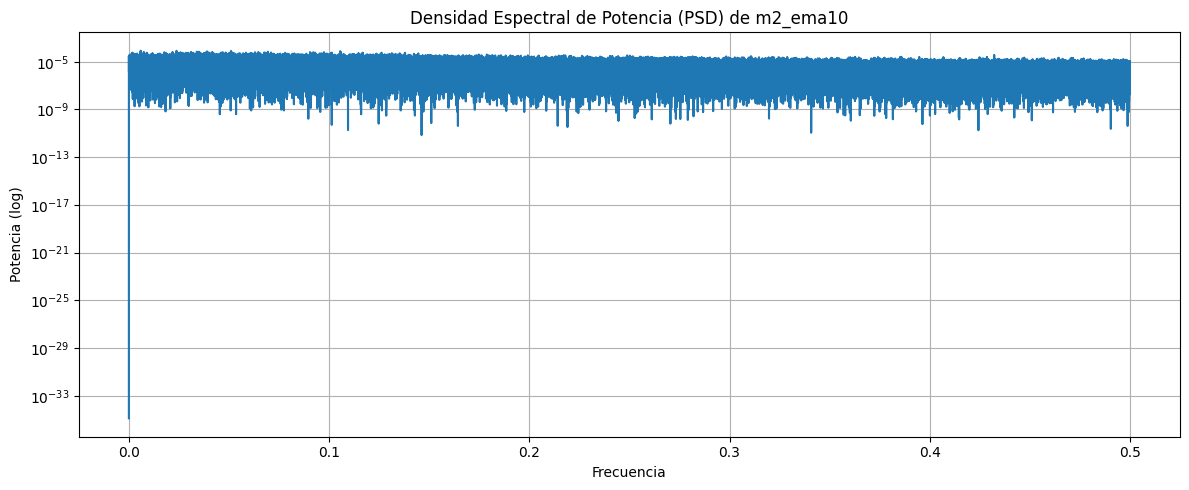

<Figure size 1200x500 with 0 Axes>

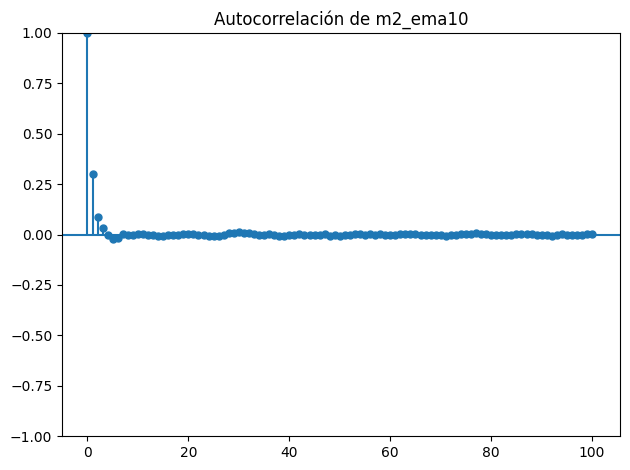

In [18]:
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

# 1. Limpiar la serie
m2_ema10_clean = mf["m2_ema10"].dropna()
N = len(m2_ema10_clean)

# 2. PSD: Densidad Espectral de Potencia
freqs, psd = periodogram(m2_ema10_clean, fs=1)  # fs=1: frecuencia de muestreo si es por pasos iguales

plt.figure(figsize=(12, 5))
plt.semilogy(freqs, psd)
plt.title("Densidad Espectral de Potencia (PSD) de m2_ema10")
plt.xlabel("Frecuencia")
plt.ylabel("Potencia (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Autocorrelación (con hasta 100 lags por ejemplo)
plt.figure(figsize=(12, 5))
plot_acf(m2_ema10_clean, lags=100, title="Autocorrelación de m2_ema10")
plt.tight_layout()
plt.show()


EMA_15

In [19]:
mf["m2_ema15"] = (mf["EMA_15"] - mf["EMA_15"].shift(1)) / mf["EMA_15"].shift(1)

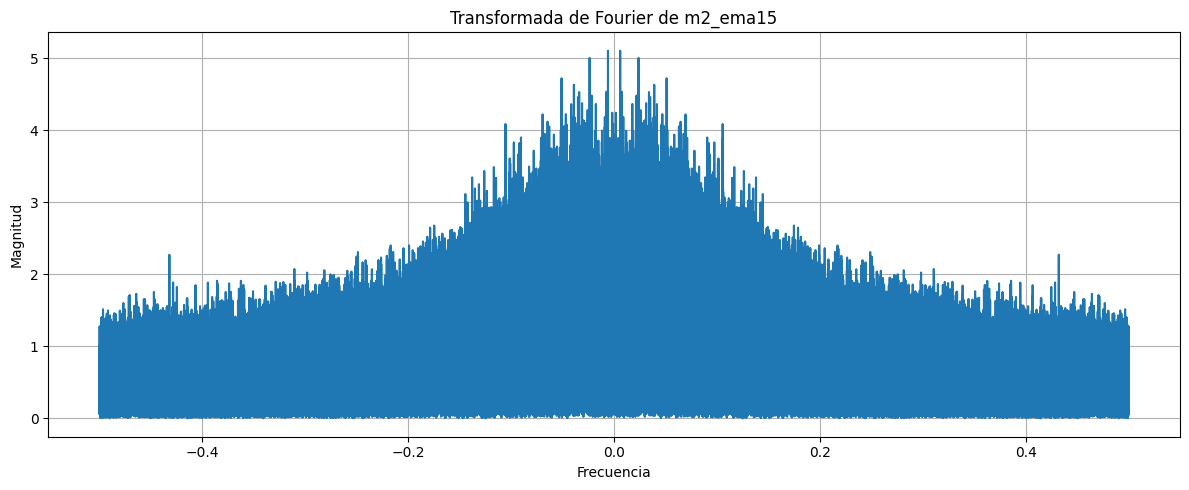

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de eliminar NaNs (por diff y shift)
m2_ema10_clean = mf['m2_ema15'].dropna()

# Aplicar la transformada de Fourier
fft_m2_ema10 = np.fft.fft(m2_ema10_clean)
freqs = np.fft.fftfreq(len(m2_ema10_clean))

# Magnitud del espectro
magnitude = np.absolute(fft_m2_ema10)

# Graficar el espectro
plt.figure(figsize=(12, 5))
plt.plot(freqs, magnitude)
plt.title('Transformada de Fourier de m2_ema15')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid(True)
plt.tight_layout()
plt.show()

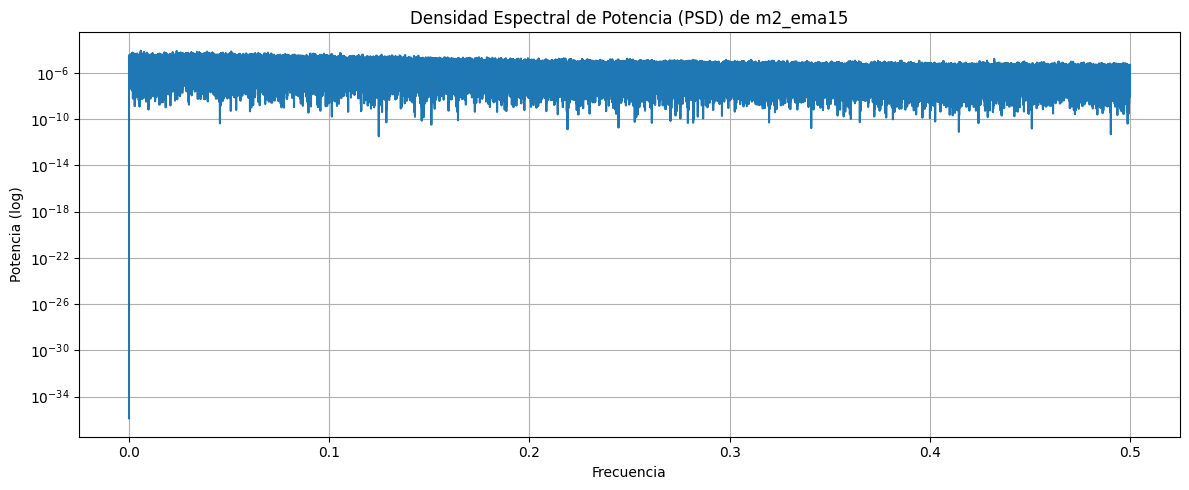

<Figure size 1200x500 with 0 Axes>

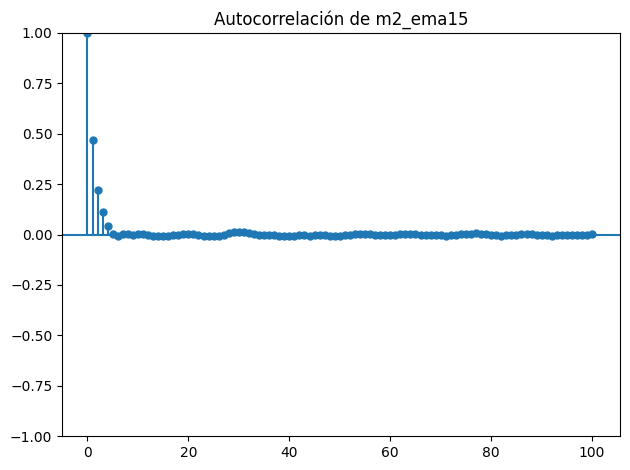

In [28]:
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

# 1. Limpiar la serie
m2_ema10_clean = mf["m2_ema15"].dropna()
N = len(m2_ema10_clean)

# 2. PSD: Densidad Espectral de Potencia
freqs, psd = periodogram(m2_ema10_clean, fs=1)  # fs=1: frecuencia de muestreo si es por pasos iguales

plt.figure(figsize=(12, 5))
plt.semilogy(freqs, psd)
plt.title("Densidad Espectral de Potencia (PSD) de m2_ema15")
plt.xlabel("Frecuencia")
plt.ylabel("Potencia (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Autocorrelación (con hasta 100 lags por ejemplo)
plt.figure(figsize=(12, 5))
plot_acf(m2_ema10_clean, lags=100, title="Autocorrelación de m2_ema15")
plt.tight_layout()
plt.show()


EMA_30

In [20]:
mf["m2_ema30"] = (mf["EMA_30"] - mf["EMA_30"].shift(1)) / mf["EMA_30"].shift(1)

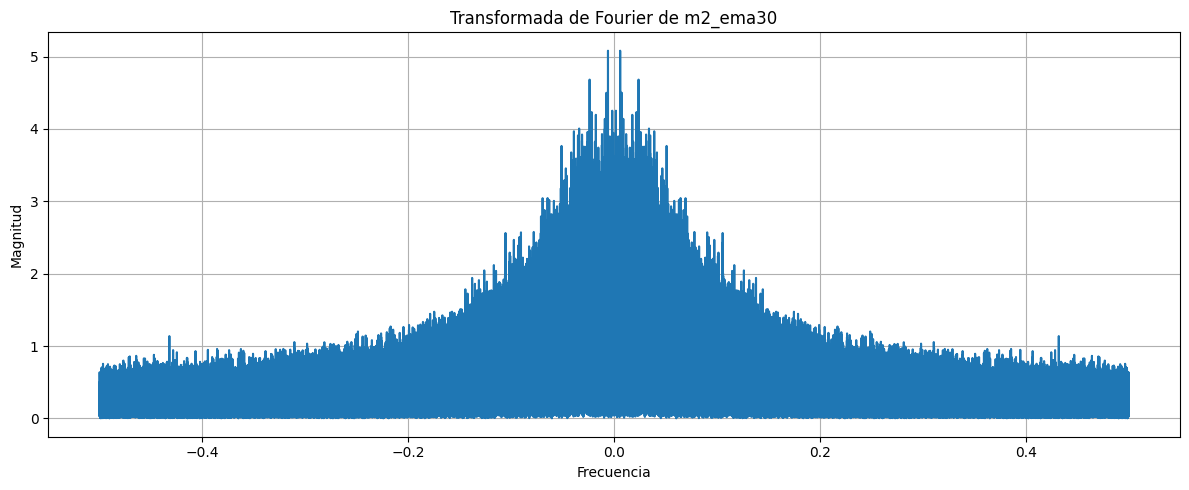

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de eliminar NaNs (por diff y shift)
m2_ema10_clean = mf['m2_ema30'].dropna()

# Aplicar la transformada de Fourier
fft_m2_ema10 = np.fft.fft(m2_ema10_clean)
freqs = np.fft.fftfreq(len(m2_ema10_clean))

# Magnitud del espectro
magnitude = np.absolute(fft_m2_ema10)

# Graficar el espectro
plt.figure(figsize=(12, 5))
plt.plot(freqs, magnitude)
plt.title('Transformada de Fourier de m2_ema30')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid(True)
plt.tight_layout()
plt.show()

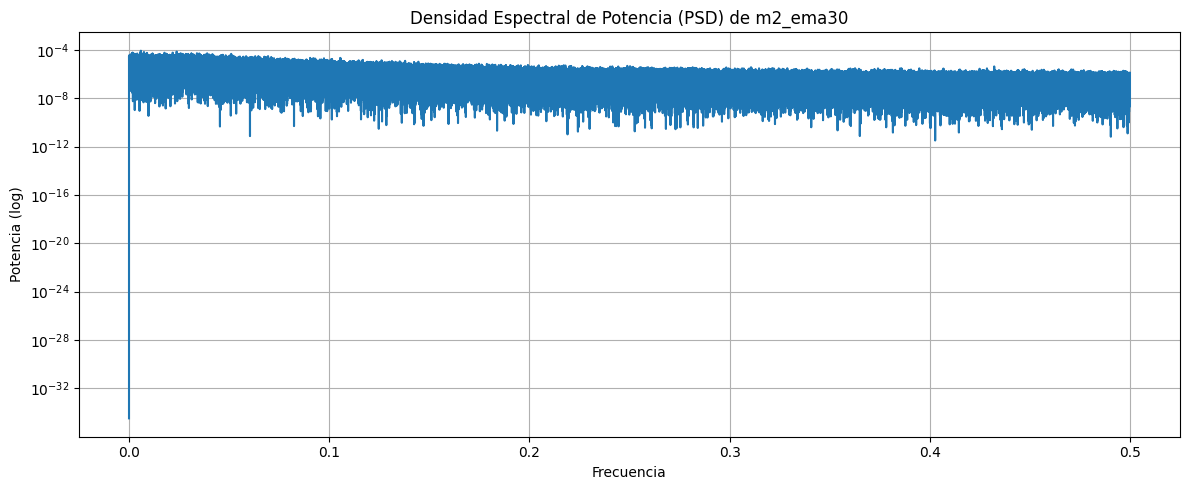

<Figure size 1200x500 with 0 Axes>

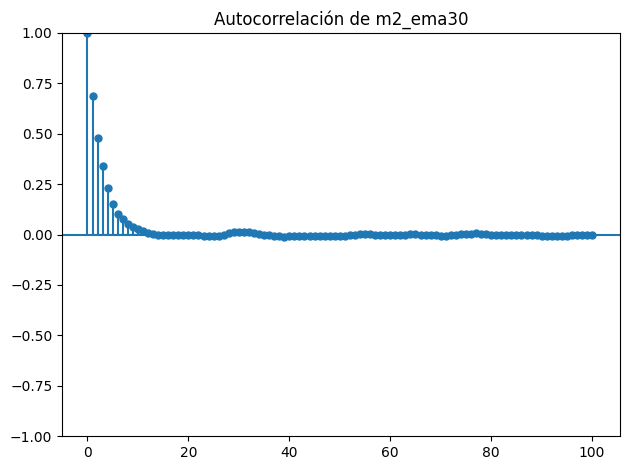

In [31]:
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

# 1. Limpiar la serie
m2_ema10_clean = mf["m2_ema30"].dropna()
N = len(m2_ema10_clean)

# 2. PSD: Densidad Espectral de Potencia
freqs, psd = periodogram(m2_ema10_clean, fs=1)  # fs=1: frecuencia de muestreo si es por pasos iguales

plt.figure(figsize=(12, 5))
plt.semilogy(freqs, psd)
plt.title("Densidad Espectral de Potencia (PSD) de m2_ema30")
plt.xlabel("Frecuencia")
plt.ylabel("Potencia (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Autocorrelación (con hasta 100 lags por ejemplo)
plt.figure(figsize=(12, 5))
plot_acf(m2_ema10_clean, lags=100, title="Autocorrelación de m2_ema30")
plt.tight_layout()
plt.show()


EMA_1h

In [21]:
mf["m2_ema1h"] = (mf["EMA_1h"] - mf["EMA_1h"].shift(1)) / mf["EMA_1h"].shift(1)

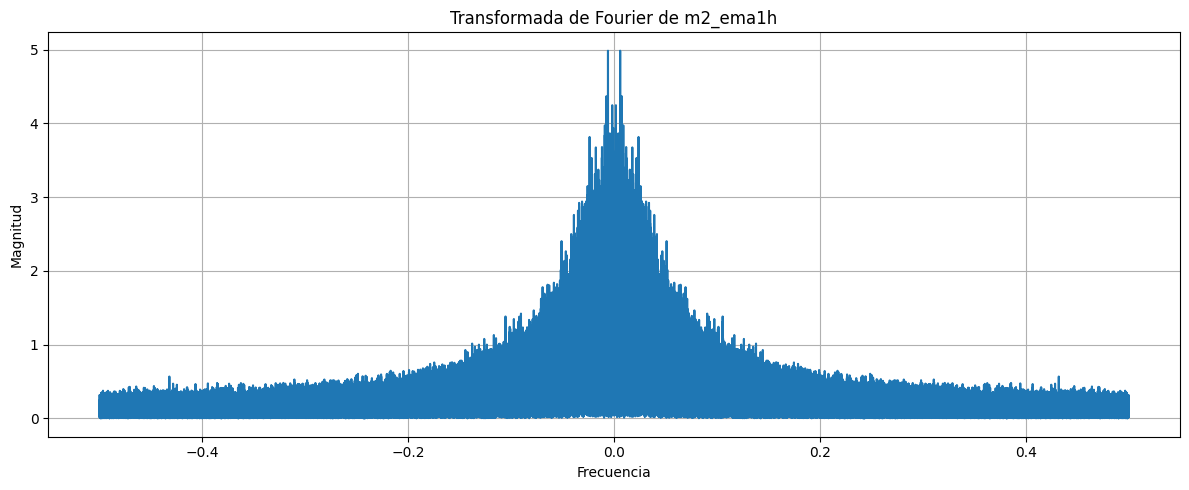

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de eliminar NaNs (por diff y shift)
m2_ema10_clean = mf['m2_ema1h'].dropna()

# Aplicar la transformada de Fourier
fft_m2_ema10 = np.fft.fft(m2_ema10_clean)
freqs = np.fft.fftfreq(len(m2_ema10_clean))

# Magnitud del espectro
magnitude = np.absolute(fft_m2_ema10)

# Graficar el espectro
plt.figure(figsize=(12, 5))
plt.plot(freqs, magnitude)
plt.title('Transformada de Fourier de m2_ema1h')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid(True)
plt.tight_layout()
plt.show()

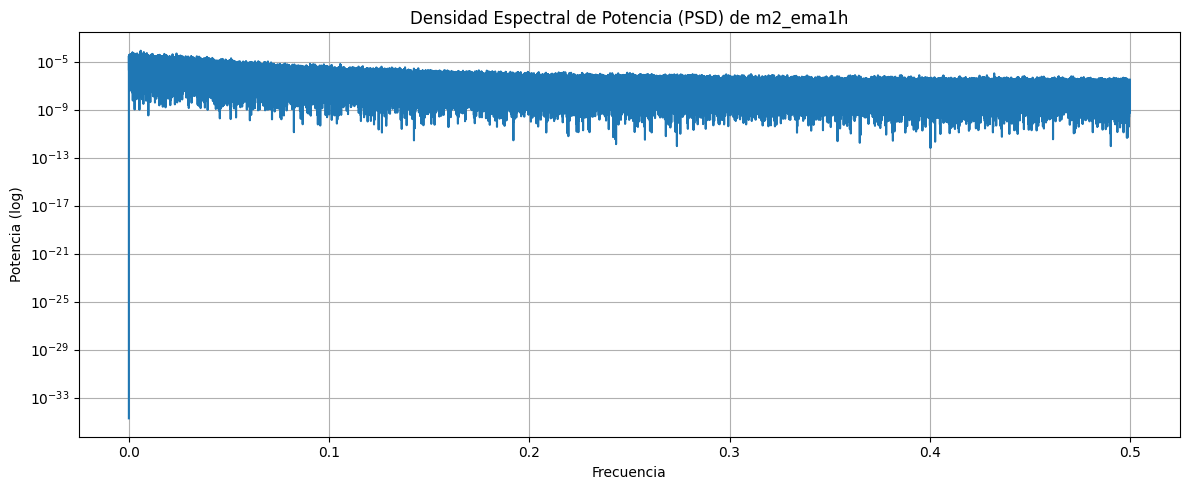

<Figure size 1200x500 with 0 Axes>

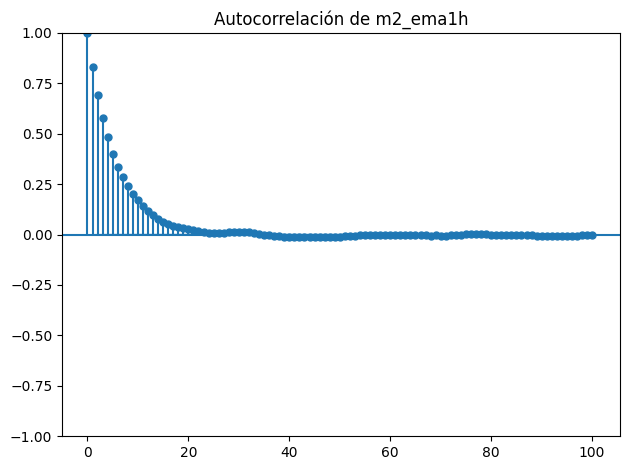

In [34]:
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

# 1. Limpiar la serie
m2_ema10_clean = mf["m2_ema1h"].dropna()
N = len(m2_ema10_clean)

# 2. PSD: Densidad Espectral de Potencia
freqs, psd = periodogram(m2_ema10_clean, fs=1)  # fs=1: frecuencia de muestreo si es por pasos iguales

plt.figure(figsize=(12, 5))
plt.semilogy(freqs, psd)
plt.title("Densidad Espectral de Potencia (PSD) de m2_ema1h")
plt.xlabel("Frecuencia")
plt.ylabel("Potencia (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Autocorrelación (con hasta 100 lags por ejemplo)
plt.figure(figsize=(12, 5))
plot_acf(m2_ema10_clean, lags=100, title="Autocorrelación de m2_ema1h")
plt.tight_layout()
plt.show()


<Figure size 1800x500 with 0 Axes>

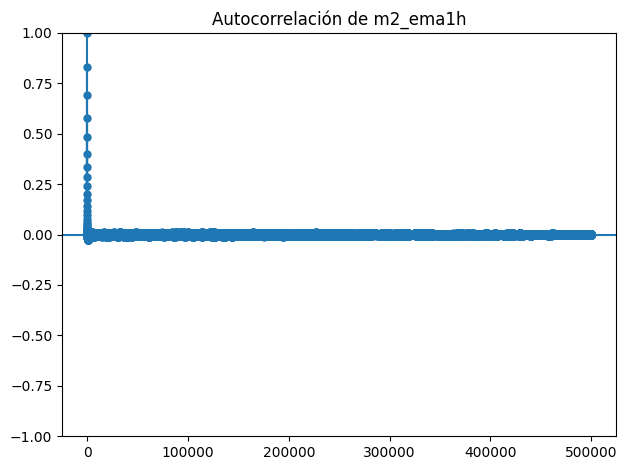

In [70]:
# 3. Autocorrelación (con hasta 100 lags por ejemplo)
plt.figure(figsize=(18, 5))
plot_acf(m2_ema10_clean, lags=500000, title="Autocorrelación de m2_ema1h")
plt.tight_layout()
plt.show()

EMA_2h

In [22]:
mf["m2_ema2h"] = (mf["EMA_2h"] - mf["EMA_2h"].shift(1)) / mf["EMA_2h"].shift(1)

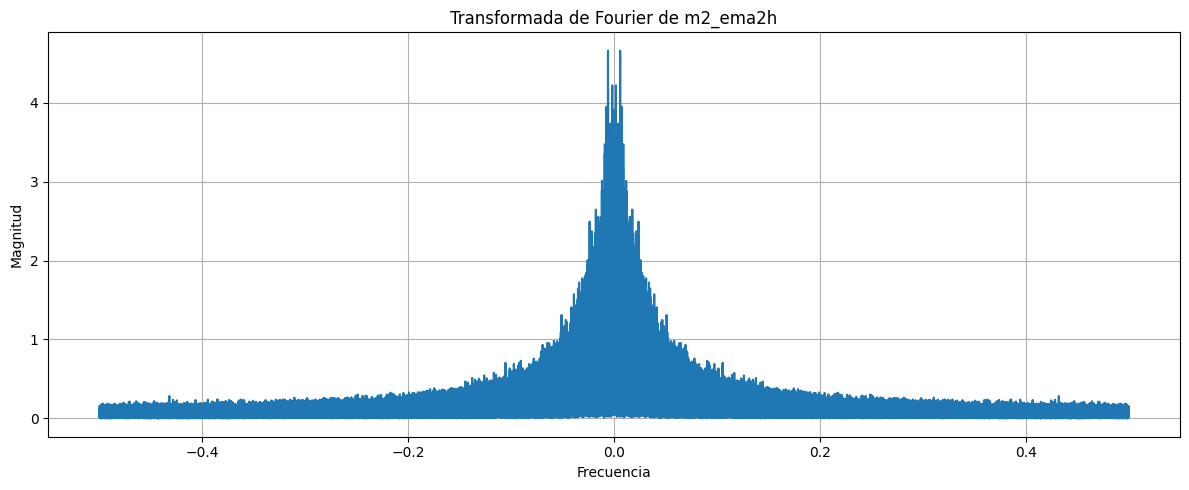

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de eliminar NaNs (por diff y shift)
m2_ema10_clean = mf['m2_ema2h'].dropna()

# Aplicar la transformada de Fourier
fft_m2_ema10 = np.fft.fft(m2_ema10_clean)
freqs = np.fft.fftfreq(len(m2_ema10_clean))

# Magnitud del espectro
magnitude = np.absolute(fft_m2_ema10)

# Graficar el espectro
plt.figure(figsize=(12, 5))
plt.plot(freqs, magnitude)
plt.title('Transformada de Fourier de m2_ema2h')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.grid(True)
plt.tight_layout()
plt.show()

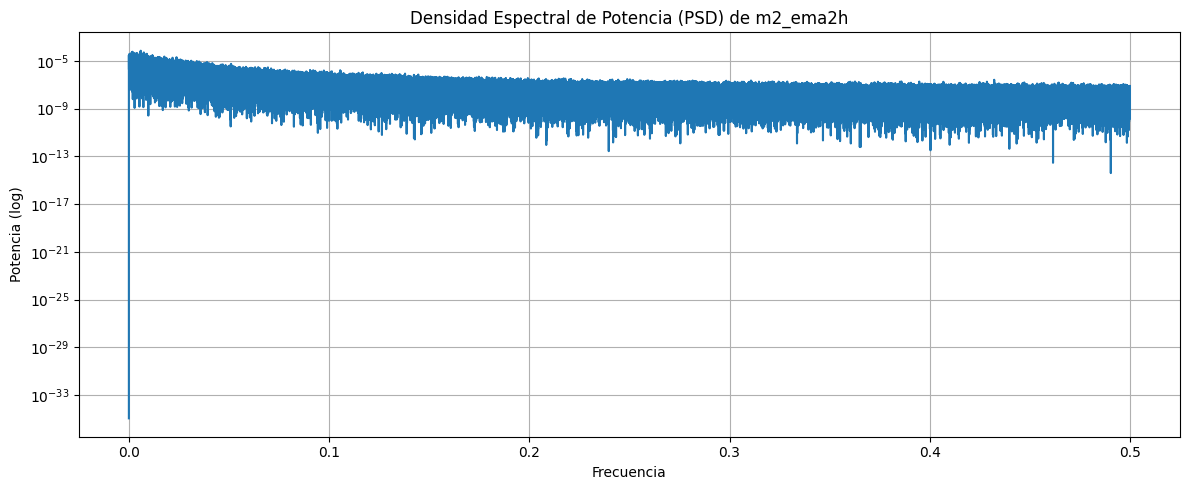

<Figure size 1200x500 with 0 Axes>

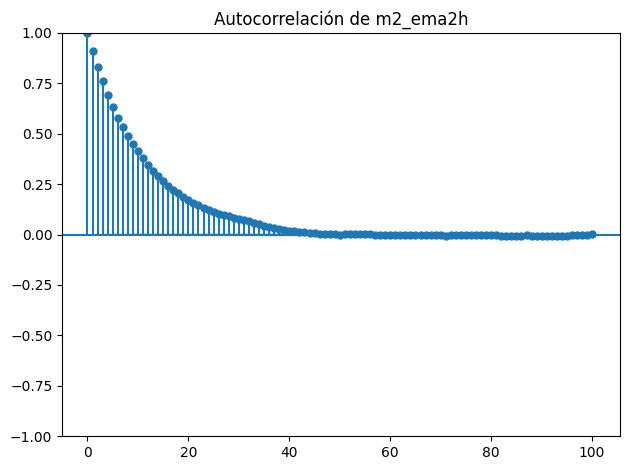

In [37]:
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

# 1. Limpiar la serie
m2_ema10_clean = mf["m2_ema2h"].dropna()
N = len(m2_ema10_clean)

# 2. PSD: Densidad Espectral de Potencia
freqs, psd = periodogram(m2_ema10_clean, fs=1)  # fs=1: frecuencia de muestreo si es por pasos iguales

plt.figure(figsize=(12, 5))
plt.semilogy(freqs, psd)
plt.title("Densidad Espectral de Potencia (PSD) de m2_ema2h")
plt.xlabel("Frecuencia")
plt.ylabel("Potencia (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Autocorrelación (con hasta 100 lags por ejemplo)
plt.figure(figsize=(12, 5))
plot_acf(m2_ema10_clean, lags=100, title="Autocorrelación de m2_ema2h")
plt.tight_layout()
plt.show()


***LABORATORY***

In [23]:
print(mf.columns.tolist())

['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'num_trades', 'taker_buy_base_vol', 'taker_buy_quote_vol', 'ignore', 'f_open', 'f_high', 'f_low', 'f_close', 'f_volume', 'f_close_time', 'f_quote_asset_volume', 'f_num_trades', 'f_taker_buy_base_vol', 'f_taker_buy_quote_vol', 'f_ignore', 'Y1_1', 'B1', 'RB', 'c2', 'm2', 'dm2', 'lclose', 'EMA_10', 'EMA_15', 'EMA_30', 'EMA_1h', 'EMA_2h', 'EMA_4h', 'EMA_6h', 'EMA_12h', 'EMA_1d', 'EMA_3d', 'EMA_4d', 'EMA_5d', 'EMA_1s', 'EMA_2s', 'EMA_1m', 'EMA_2m', 'EMA_3m', 'EMA_4m', 'EMA_5m', 'EMA_6m', 'EMA_9m', 'EMA_1a', 'EMA_2a', 'EMA_3a', 'm2_ema10', 'm2_ema15', 'm2_ema30', 'm2_ema1h', 'm2_ema2h']


Experimental

Media: 0.0000
Mediana: 0.0000
Moda: -0.0733
Desviación estándar: 0.0015
Varianza muestral: 0.0000
Varianza poblacional: 0.0000
Coeficiente de variación (CV): 292.6261
Rango intercuartílico (IQR): 0.0010
Asimetría (skew): 0.4896
Curtosis: 232.6732


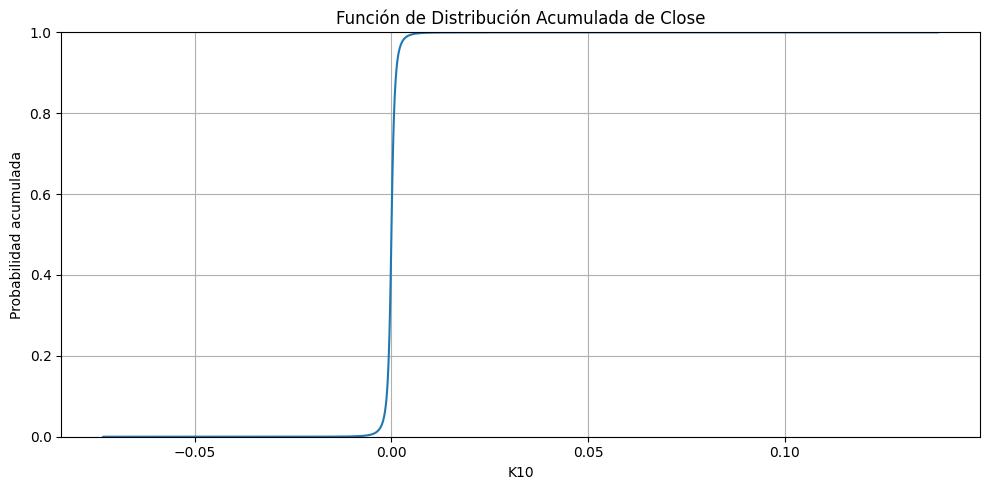

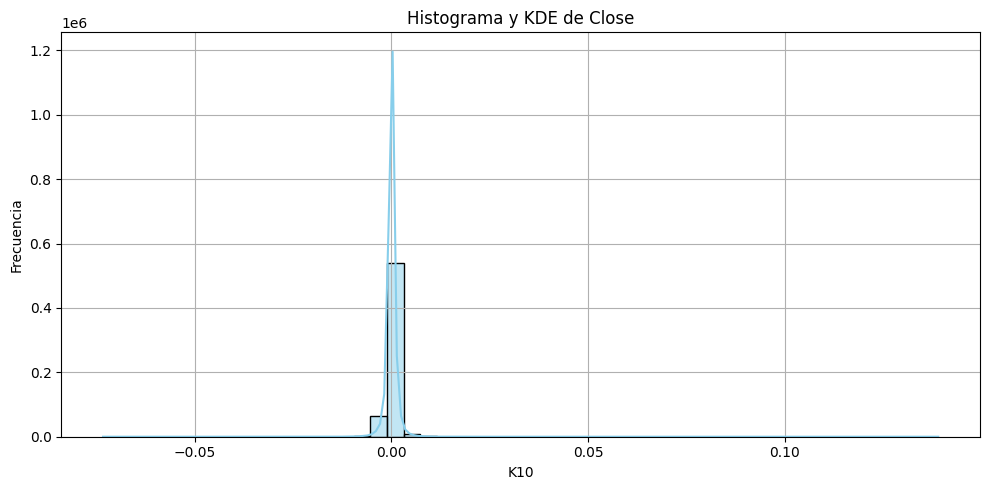

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, mode
import numpy as np


# Filtrar valores nulos e infinitos
data = mf["m2_ema10"].replace([np.inf, -np.inf], np.nan).dropna()


# Estadísticos descriptivos
media = data.mean()
mediana = data.median()
moda = mode(data, keepdims=True).mode[0]
desv_std = data.std()
var_muestral = data.var()
var_poblacional = data.var(ddof=0)
coef_var = (desv_std / media) if media != 0 else np.nan
iqr = data.quantile(0.75) - data.quantile(0.25)
asimetria = skew(data)
curtosis_val = kurtosis(data)

# Mostrar estadísticas
print(f"Media: {media:.4f}")
print(f"Mediana: {mediana:.4f}")
print(f"Moda: {moda:.4f}")
print(f"Desviación estándar: {desv_std:.4f}")
print(f"Varianza muestral: {var_muestral:.4f}")
print(f"Varianza poblacional: {var_poblacional:.4f}")
print(f"Coeficiente de variación (CV): {coef_var:.4f}")
print(f"Rango intercuartílico (IQR): {iqr:.4f}")
print(f"Asimetría (skew): {asimetria:.4f}")
print(f"Curtosis: {curtosis_val:.4f}")


# Gráfico 1: Función de distribución acumulada
plt.figure(figsize=(10, 5))
sns.ecdfplot(data)
plt.title(f'Función de Distribución Acumulada de Close')
plt.xlabel("K10")
plt.ylabel('Probabilidad acumulada')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 2: Histograma con KDE
plt.figure(figsize=(10, 5))
sns.histplot(data, kde=True, bins=50, color='skyblue')
plt.title(f'Histograma y KDE de Close')
plt.xlabel("K10")
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

ANALISIS FRIO

In [34]:
# Asegurate de que no haya NaNs
df_bbr = mf[['m2']].dropna().copy()

# Obtener los valores de corte de cada decil
percentiles = [i / 4 for i in range(5)]  # 0.0, 0.1, ..., 1.0
limites_deciles = df_bbr['m2'].quantile(percentiles)

print(limites_deciles)

0.00   -0.102254
0.25   -0.000751
0.50    0.000000
0.75    0.000764
1.00    0.184288
Name: m2, dtype: float64


In [ ]:
# Asegurate de que no haya NaNs
df_bbr = mf[['m2_ema10']].dropna().copy()

# Obtener los valores de corte de cada decil
percentiles = [i / 4 for i in range(5)]  # 0.0, 0.1, ..., 1.0
limites_deciles = df_bbr['m2_ema10'].quantile(percentiles)

print(limites_deciles)

0.00   -0.073343
0.25   -0.000505
0.50    0.000004
0.75    0.000521
1.00    0.139100
Name: m2_ema10, dtype: float64


In [32]:
# Asegurate de que no haya NaNs
df_bbr = mf[['m2_ema2h']].dropna().copy()

# Obtener los valores de corte de cada decil
percentiles = [i / 4 for i in range(5)]  # 0.0, 0.1, ..., 1.0
limites_deciles = df_bbr['m2_ema2h'].quantile(percentiles)

print(limites_deciles)

0.00   -0.015423
0.25   -0.000126
0.50    0.000006
0.75    0.000141
1.00    0.014312
Name: m2_ema2h, dtype: float64


Resultados

Transformacion sigmoide sin romper temporalidad

In [ ]:
import numpy as np
import pandas as pd
from scipy.special import expit  # Sigmoid

def rolling_quantile_sigmoid_batch(df, columns, window=50000, min_periods=10000, epsilon=1e-9):
    """
    Para cada columna en `columns`, agrega dos nuevas columnas al DataFrame:
    - _pct: percentil histórico rolling
    - _sig: sigmoide aplicada sobre el percentil

    Todo el cálculo respeta la temporalidad: solo usa datos pasados.

    Parámetros:
    - df: DataFrame original (modificado in-place)
    - columns: lista de columnas a procesar
    - window: tamaño total de la ventana rolling
    - min_periods: mínimo de observaciones válidas necesarias
    """
    for col in columns:
        values = df[col].values
        pct_result = np.full_like(values, fill_value=np.nan, dtype=float)
        sig_result = np.full_like(values, fill_value=np.nan, dtype=float)

        for t in range(window, len(values)):
            window_values = values[t - window:t]
            window_values = window_values[~np.isnan(window_values)]

            if len(window_values) < min_periods or np.isnan(values[t]):
                continue

            rank = np.sum(window_values < values[t])
            percentile = rank / len(window_values)
            percentile = np.clip(percentile, epsilon, 1 - epsilon)

            pct_result[t] = percentile
            sig_result[t] = expit(10 * (percentile - 0.5))

        df[f"{col}_pct"] = pct_result
        df[f"{col}_sig"] = sig_result

    return df

In [ ]:
columnas_a_transformar = ["M5", "M10", "M15", "M30", "M1h", "BBR_10", "BBR_15", "BBR_30"]

mf1 = rolling_quantile_sigmoid_batch(mf1, columnas_a_transformar)

/tmp/ipython-input-25-386995043.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_pct"] = pct_result
/tmp/ipython-input-25-386995043.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{col}_sig"] = sig_result
/tmp/ipython-input-25-386995043.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

In [ ]:
# "BBR_1h", "BBR_2h" son cuasi normales si transformacion

Categoricas

In [ ]:
k_vars = ['K15', 'K30', 'K1h', 'K2h', 'K2m', 'K4m', 'K6m']

# Aplicamos versión categórica
def categorizar_k(k_value):
    if k_value <= 33:
        return 0  # Sobreventa
    elif k_value >= 67:
        return 2  # Sobrecompra
    else:
        return 1  # Zona neutra

for k in k_vars:
        mf1[f'{k}_cat'] = mf1[k].apply(categorizar_k)


/tmp/ipython-input-28-2531022637.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'{k}_cat'] = mf1[k].apply(categorizar_k)
/tmp/ipython-input-28-2531022637.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mf1[f'{k}_cat'] = mf1[k].apply(categorizar_k)
/tmp/ipython-input-28-2531022637.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

In [ ]:
print(mf1.columns.tolist())

['Datetime', 'High', 'Low', 'Close', 'Volume', 'ETH_Close', 'ETH_Volume', 'USDT_Close', 'USDT_Volume', 'XRP_Close', 'XRP_Volume', 'SOL_Close', 'SOL_Volume', 'DOGE_Close', 'DOGE_Volume', 'Y1_1', 'B1', 'SD_2', 'VB10', 'SD_3', 'VB15', 'SD_6', 'VB30', 'SD_12', 'VB1h', 'SD_24', 'VB2h', 'SD_48', 'VB4h', 'SD_72', 'VB6h', 'SD_96', 'VB8h', 'SD_144', 'VB12h', 'SD_288', 'VB1d', 'SD_864', 'VB3d', 'SD_1152', 'VB4d', 'SD_1440', 'VB5d', 'SD_2160', 'VB1s', 'SD_4320', 'VB2s', 'SD_9132', 'VB1m', 'SD_18264', 'VB2m', 'SD_27369', 'VB3m', 'SD_36528', 'VB4m', 'SD_45660', 'VB5m', 'SD_54792', 'VB6m', 'SD_82188', 'VB9m', 'SD_109575', 'VB1a', 'SD_219150', 'VB2a', 'SD_328725', 'VB3a', 'SD_438300', 'VB4a', 'VoSD_2', 'VVo10', 'VoSD_3', 'VVo15', 'VoSD_6', 'VVo30', 'VoSD_12', 'VVo1h', 'VoSD_24', 'VVo2h', 'VoSD_48', 'VVo4h', 'VoSD_72', 'VVo6h', 'VoSD_96', 'VVo8h', 'VoSD_144', 'VVo12h', 'VoSD_288', 'VVo1d', 'VoSD_864', 'VVo3d', 'VoSD_1152', 'VVo4d', 'VoSD_1440', 'VVo5d', 'VoSD_2160', 'VVo1s', 'VoSD_4320', 'VVo2s', 'VoS

# Vld

In [14]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Lista de variables
variables = ['freqs', "m2_tf_freq", "lm2_tf_freq", 'magnitude', "c2", 'm2', 'RB', 'B1', "m2_ema1h", "dm2", "jerk_mean_5", "jerk_std_5"]

# Preprocesamiento: reemplazo de NaN con 0 (puede ajustar si preferís otra estrategia)
X = mf[variables].fillna(0)
y = mf['Y1_1'].fillna(1).astype(int)

# Cálculo de información mutua
mi = mutual_info_classif(X, y)

# Mostrar resultados como DataFrame ordenado
mi_df = pd.DataFrame({'Variable': variables, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print(mi_df)


KeyError: "['freqs', 'm2_tf_freq', 'lm2_tf_freq', 'magnitude', 'm2_ema1h', 'jerk_mean_5', 'jerk_std_5'] not in index"

# CVS

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


SAVE

In [12]:
# Montar Google Drive
drive.mount('/content/drive')

# Ruta donde querés guardar el archivo (podés cambiar el nombre o carpeta)
ruta_guardado = '/content/drive/MyDrive/mf1.parquet'

# Guardar en formato Parquet, conservando la estructura y tipos
mf1.to_parquet(ruta_guardado, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Montar Google Drive
drive.mount('/content/drive')

# Ruta donde querés guardar el archivo (podés cambiar el nombre o carpeta)
ruta_guardado = '/content/drive/MyDrive/mf2.parquet'

# Guardar en formato Parquet, conservando la estructura y tipos
mf2.to_parquet(ruta_guardado, index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Montar Google Drive
drive.mount('/content/drive')

# Ruta donde querés guardar el archivo (podés cambiar el nombre o carpeta)
ruta_guardado = '/content/drive/MyDrive/mf.parquet'

# Guardar en formato Parquet, conservando la estructura y tipos
mf.to_parquet(ruta_guardado, index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


APERTURA

In [3]:
mf = pd.read_parquet('/content/drive/MyDrive/mf.parquet')


In [4]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617894 entries, 0 to 617893
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   timestamp              617894 non-null  datetime64[ns]
 1   open                   617894 non-null  float64       
 2   high                   617894 non-null  float64       
 3   low                    617894 non-null  float64       
 4   close                  617894 non-null  float64       
 5   volume                 617894 non-null  float64       
 6   close_time             617894 non-null  float64       
 7   quote_asset_volume     617894 non-null  float64       
 8   num_trades             617894 non-null  float64       
 9   taker_buy_base_vol     617894 non-null  float64       
 10  taker_buy_quote_vol    617894 non-null  float64       
 11  ignore                 617894 non-null  float64       
 12  f_open                 617894 non-null  floa

In [ ]:
mf1 = pd.read_parquet('/content/drive/MyDrive/mf1.parquet')


In [ ]:
mf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617894 entries, 0 to 617893
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   timestamp              617894 non-null  datetime64[ns]
 1   open                   617894 non-null  float64       
 2   high                   617894 non-null  float64       
 3   low                    617894 non-null  float64       
 4   close                  617894 non-null  float64       
 5   volume                 617894 non-null  float64       
 6   close_time             617894 non-null  float64       
 7   quote_asset_volume     617894 non-null  float64       
 8   num_trades             617894 non-null  float64       
 9   taker_buy_base_vol     617894 non-null  float64       
 10  taker_buy_quote_vol    617894 non-null  float64       
 11  ignore                 617894 non-null  float64       
 12  f_open                 617894 non-null  floa